In [1]:
import os
import pandas as pd
import numpy as np
import scipy

from auditory_cortex.analyses import Correlations
from auditory_cortex import saved_corr_dir, results_dir
from auditory_cortex.neural_data.normalizer import Normalizer
from auditory_cortex.dataloader import DataLoader
from auditory_cortex.io_utils import io

import matplotlib.pylab as plt
%matplotlib inline

norm_obj = Normalizer()

/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


Using default normalizer file...


In [3]:
norm_obj.metadata.get_sampling_rate(mVocs=True)

41000

In [ ]:
sampling_rate = self.metadata.get_sampling_rate(mVocs=True)

In [1]:
from auditory_cortex import cache_dir
cache_dir

'/scratch/gilbreth/ahmedb/cache'

In [3]:
norm_obj.metadata.get_all_available_sessions().shape

(41,)

In [3]:
norm_obj.metadata.get_total_test_duration(mVocs=True)

11.265749999999999

In [4]:
bin_width = 10
mVocs=True
null_dist = norm_obj.get_normalizer_null_dist_using_poisson(bin_width=bin_width, mVocs=mVocs)
threshold = np.percentile(null_dist, 95) 
threshold

Null dist. (mVocs) not found: for bin-width 10ms and 50Hz spike rate.
Poisson Process: Null distribution for bin_width: 10, spike_rate: 50...
Null dist. poisson saved to: /scratch/gilbreth/ahmedb/cache/normalizers/mVocs/null_distribution/normalizers_null_dist_poisson_bw_10ms_spike_rate_50hz.pkl


0.052677613549367834

In [10]:
for mVoc_id in norm_obj.metadata.mVoc_test_stimIds:
	tr_id = norm_obj.metadata.get_mVoc_tr_id(mVoc_id)[0]
	norm_obj.metadata.get_mVoc_dur(tr_id)

	print(norm_obj.metadata.get_mVoc_dur(tr_id))


	print(f"for {mVoc_id}, {norm_obj.metadata.get_mVoc_tr_id(mVoc_id)[0]}")

0.78625
for 7, 6
1.526125
for 9, 8
0.811375
for 12, 11
0.7643125
for 15, 14
0.6231875
for 24, 23
1.2374375
for 29, 28
0.6865625
for 30, 29
1.7520625
for 33, 33
0.9864375
for 44, 47
1.4561875
for 45, 48
0.6358125
for 48, 51


In [2]:
session = 200206
bin_width = 50
delay = 0
mVocs = True
normalizer = norm_obj.get_normalizer_for_session_random_pairs(
	session, bin_width, delay, mVocs=mVocs
)

In [7]:
all_normalizers = io.read_normalizer_distribution(bin_width, delay, method='random', mVocs=mVocs)

In [8]:
len(list(all_normalizers.keys()))

37

In [5]:
normalizer.shape

(100000, 64)

In [4]:
# spike_rate = 
bin_width = 20
test_duration = norm_obj.metadata.get_total_test_duration()
# total_spikes = int(spike_rate * test_duration)
num_bins = int(np.ceil(round(1000*test_duration/bin_width, 3)))
print(f"For bin width: {bin_width} ms, number of samples: {num_bins}")

For bin width: 20 ms, number of samples: 828


In [5]:
bin_width = 50
test_duration = norm_obj.metadata.get_total_test_duration()
# total_spikes = int(spike_rate * test_duration)
num_bins = int(np.ceil(round(1000*test_duration/bin_width, 3)))
print(f"For bin width: {bin_width} ms, number of samples: {num_bins}")

For bin width: 50 ms, number of samples: 332


In [7]:
test_duration*20

331.0137500000001

In [3]:
bin_width=50
p_threshold = 0.05
significant_sessions_and_channels = norm_obj.get_significant_sessions_and_channels_using_poisson_null(
            bin_width=bin_width, p_threshold=p_threshold 
            )
total_channels = 0
for sess in significant_sessions_and_channels.keys():
    total_channels += len(significant_sessions_and_channels[sess])
print(f"Total tuned channels: {total_channels}, using p-value: {p_threshold}")

Total tuned channels: 602, using p-value: 0.05


In [4]:
total_channels = 0
sessions = norm_obj.metadata.get_all_available_sessions()
for session in sessions:
    num_channels = norm_obj.metadata.get_num_channels(session)
    total_channels += num_channels

print(f"Total available channels: {total_channels}")

Total available channels: 1718


In [ ]:
bin_width=50
p_threshold = 0.05
significant_sessions_and_channels = norm_obj.get_significant_sessions_and_channels_using_poisson_null(
            bin_width=bin_width, p_threshold=p_threshold 
            )
total_channels = 0
for sess in significant_sessions_and_channels.keys():
    total_channels += len(significant_sessions_and_channels[sess])
print(f"Total tuned channels: {total_channels}, using p-value: {p_threshold}")

In [3]:
session = 180720
bin_width = 50
norm_dist = norm_obj.get_normalizer_for_session_app(
	session=session, bin_width=bin_width
)

In [14]:
np.mean(norm_dist[...,13])

0.04383772818031269

In [15]:
session = 180719
bin_width = 50
norm_dist = norm_obj.get_normalizer_for_session_app(
	session=session, bin_width=bin_width
)
np.mean(norm_dist[...,11])

0.010083886247118496

In [7]:
norm_dist.shape

(2310, 16)

In [6]:
results_dir

'/depot/jgmakin/data/auditory_cortex/results/'

In [ ]:
import numpy as np
from utils_jgm.toolbox import r_pearson
rng = np.random.default_rng()

NsN_experiments = 407
N_types = 10
N_tokens = 11
N_samples = 15

rate parametersl1 = 3
l2 = 6
l3 = 10
# derived params (see https://math.stackexchange.com/questions/244989/)
rho = l2/( (l1 + l2)_(l2 + l3) )**(1/2)
N_repeats = N_experiments_N_types

independent Poisson RVsY1 = rng.poisson(l1, N_repeats_N_tokens_N_samples)
Y2 = rng.poisson(l2, N_repeats_N_tokens_N_samples)
Y3 = rng.poisson(l3, N_repeats_N_tokens_N_samples)

dependent Poisson RVs
X1 = Y1 + Y2
X2 = Y2 + Y3

def reshape(Z, N, M):
	return Z.reshape(N*M, -1)
def r_split(Z1, Z2, N, M):
	R = r_pearson(reshape(Z1, N, M), reshape(Z2, N, M), MATRIX=False)
	return np.mean(R.reshape(N, M), axis=1)
def MSE(R):
	return np.mean( (np.mean(R.reshape(N_experiments, N_types), axis=1) - rho)**2 )

### Makins simulation..

In [17]:
import numpy as np
from utils_jgm.toolbox import r_pearson
rng = np.random.default_rng()


# Ns
N_experiments = 407
N_types = 10
N_tokens = 11
N_samples = 15

# rate parameters
l1 = 3
l2 = 6
l3 = 10

# derived params (see https://math.stackexchange.com/questions/244989/)
rho = l2/( (l1 + l2)*(l2 + l3) )**(1/2)
N_repeats = N_experiments*N_types

# independent Poisson RVs
Y1 = rng.poisson(l1, N_repeats*N_tokens*N_samples)
Y2 = rng.poisson(l2, N_repeats*N_tokens*N_samples)
Y3 = rng.poisson(l3, N_repeats*N_tokens*N_samples)

# dependent Poisson RVs
X1 = Y1 + Y2
X2 = Y2 + Y3

# helper functions
def reshape(Z, N, M):
    return Z.reshape(N*M, -1)
    
def r_split(Z1, Z2, N, M):
    R = r_pearson(reshape(Z1, N, M), reshape(Z2, N, M), MATRIX=False)
    return np.mean(R.reshape(N, M), axis=1)

def MSE(R):
    return np.mean( (np.mean(R.reshape(N_experiments, N_types), axis=1) - rho)**2 )


# compute correlations two ways: either "concatenating trials" or not
R_short_trials = r_split(X1, X2, N_repeats, N_tokens)
R_long_trials = r_split(X1, X2, N_repeats, 1)
R_super_long = r_split(X1, X2, 1, 1)

# plt.hist(R_a, alpha=0.5)
# plt.hist(R_b, alpha=0.5)

print('rho: %.3f' % rho)
print('MSE: %0.3g' % MSE(R_short_trials))
print('MSE: %0.3g' % MSE(R_long_trials))
print('MSE: %0.3g' % ((R_super_long - rho)**2 ))


rho: 0.500
MSE: 0.000589
MSE: 0.000375
MSE: 1.2e-06


### significant sessions and channels..

In [2]:
bin_width = 50
p_threshold = 0.01
sig_sessions_and_channels = norm_obj._compute_significant_sessions_and_channels_using_poisson_null(
	bin_width=bin_width, p_threshold=p_threshold
)

Total significant neurons at 50ms bin width = 697


In [3]:
bin_width = 50
p_threshold = 0.05
sig_sessions_and_channels = norm_obj._compute_significant_sessions_and_channels_using_poisson_null(
	bin_width=bin_width, p_threshold=p_threshold
)

Total significant neurons at 50ms bin width = 710


### Normalizers comparison: bootsrapping vs app using fixed pairing..

In [1]:
from auditory_cortex import utils


def get_norm_dist_fixed_concate(session, bin_width=50, delay=0):

	dataset = norm_obj._get_dataset_obj(session)
	all_repeated_trials = dataset.get_repeated_trials(
			bin_width=bin_width, delay=delay
			)

	dist = []
	for tr1 in range(11):
		for tr2 in range(11):
			if tr2 > tr1:
				seq1 = all_repeated_trials[tr1]
				seq2 = all_repeated_trials[tr2]
				dist.append(utils.cc_norm(seq1, seq2))
	dist_app = np.stack(dist)
	return dist_app

In [4]:
session = 200206
bin_width = 50
norm_dist = norm_obj.get_normalizer_for_session_random_pairs(
	session=session, bin_width=bin_width
)
# np.mean(norm_dist[...,11])

In [53]:
session = 200206
bin_width = 50
norm_app_old = norm_obj.get_normalizer_for_session_app(
	session=session, bin_width=bin_width
)

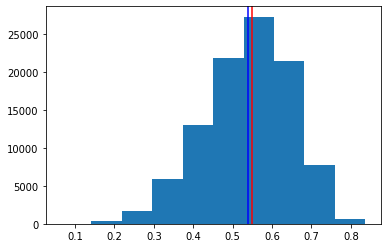

In [9]:
ch = 62
plt.hist(norm_dist[:,ch])
plt.axvline(np.median(norm_dist[:,ch]), color='red')
plt.axvline(np.mean(norm_dist[:,ch]), color='blue')

Text(0.5, 1.0, 'session-200206')

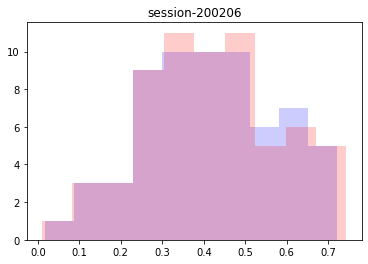

In [15]:
means = np.mean(norm_dist, axis=0)
medians = np.median(norm_dist, axis=0)

plt.hist(means, color='blue', label='means', alpha=0.2)
plt.hist(medians, color='red', label='medians', alpha=0.2)
plt.title(f"session-{session}")

In [28]:
session = 200206
bin_width = 50
delay=0

dataset = norm_obj._get_dataset_obj(session)
all_repeated_trials = dataset.get_repeated_trials(
		bin_width=bin_width, delay=delay
		)

dist = []
for tr1 in range(11):
	for tr2 in range(11):
		if tr2 > tr1:
			seq1 = all_repeated_trials[tr1]
			seq2 = all_repeated_trials[tr2]
			dist.append(utils.cc_norm(seq1, seq2))
dist_app = np.stack(dist)

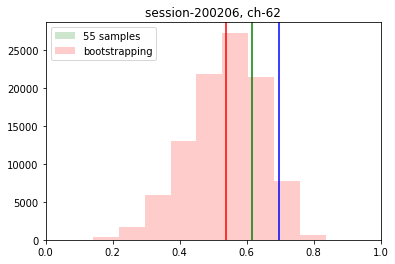

In [63]:
ch = 62
fig, ax1 = plt.subplots()
ax1.hist(dist_app[:, ch], color='green', label='55 samples', alpha=0.2)
ax1.axvline(np.mean(dist_app[:, ch]), color='green')

# ax1.hist(norm_app_old[:, ch], color='blue', label='55 samples', alpha=0.2)
ax1.axvline(np.mean(norm_app_old[:, ch]), color='blue')
# ax2 = ax1.twinx()
ax1.hist(norm_dist[:, ch], color='red', label='bootstrapping', alpha=0.2)
ax1.axvline(np.mean(norm_dist[:, ch]), color='red')
plt.xlim([0,1])
plt.title(f"session-{session}, ch-{ch}")
plt.legend(loc='best')
plt.show()

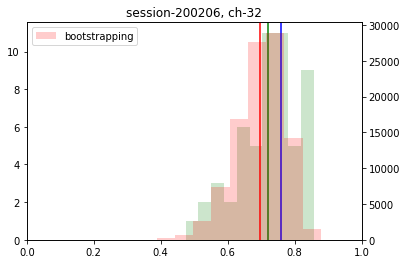

In [64]:
ch = 32
fig, ax1 = plt.subplots()
ax1.hist(dist_app[:, ch], color='green', label='55 samples', alpha=0.2)
ax1.axvline(np.mean(dist_app[:, ch]), color='green')
ax1.axvline(np.mean(norm_app_old[:, ch]), color='blue')
ax2 = ax1.twinx()
ax2.hist(norm_dist[:, ch], color='red', label='bootstrapping', alpha=0.2)
ax2.axvline(np.mean(norm_dist[:, ch]), color='red')

plt.xlim([0,1])
plt.title(f"session-{session}, ch-{ch}")
plt.legend(loc='best')
plt.show()

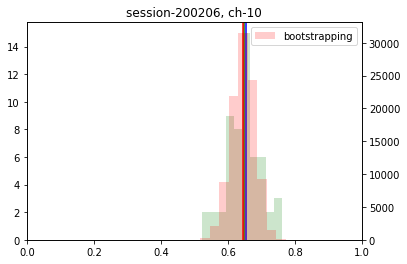

In [65]:
ch = 10
fig, ax1 = plt.subplots()
ax1.hist(dist_app[:, ch], color='green', label='55 samples', alpha=0.2)
ax1.axvline(np.mean(dist_app[:, ch]), color='green')
ax1.axvline(np.mean(norm_app_old[:, ch]), color='blue')
ax2 = ax1.twinx()
ax2.hist(norm_dist[:, ch], color='red', label='bootstrapping', alpha=0.2)
ax2.axvline(np.mean(norm_dist[:, ch]), color='red')
plt.xlim([0,1])
plt.title(f"session-{session}, ch-{ch}")
plt.legend(loc='best')
plt.show()

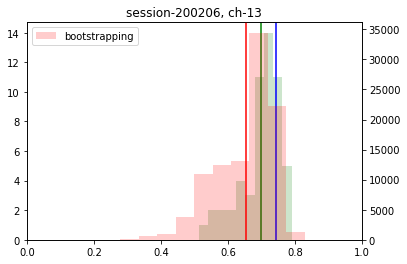

In [66]:
ch = 13
fig, ax1 = plt.subplots()
ax1.hist(dist_app[:, ch], color='green', label='55 samples', alpha=0.2)
ax1.axvline(np.mean(dist_app[:, ch]), color='green')
ax1.axvline(np.mean(norm_app_old[:, ch]), color='blue')
ax2 = ax1.twinx()
ax2.hist(norm_dist[:, ch], color='red', label='bootstrapping', alpha=0.2)
ax2.axvline(np.mean(norm_dist[:, ch]), color='red')
plt.xlim([0,1])
plt.title(f"session-{session}, ch-{ch}")
plt.legend(loc='best')
plt.show()

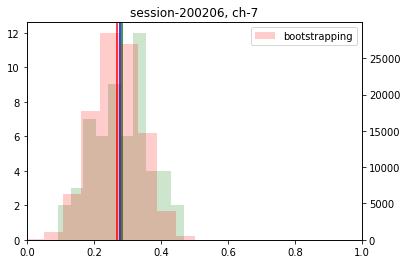

In [67]:
ch = 7
fig, ax1 = plt.subplots()
ax1.hist(dist_app[:, ch], color='green', label='55 samples', alpha=0.2)
ax1.axvline(np.mean(dist_app[:, ch]), color='green')
ax1.axvline(np.mean(norm_app_old[:, ch]), color='blue')
ax2 = ax1.twinx()
ax2.hist(norm_dist[:, ch], color='red', label='bootstrapping', alpha=0.2)
ax2.axvline(np.mean(norm_dist[:, ch]), color='red')
plt.xlim([0,1])
plt.title(f"session-{session}, ch-{ch}")
plt.legend(loc='best')
plt.show()

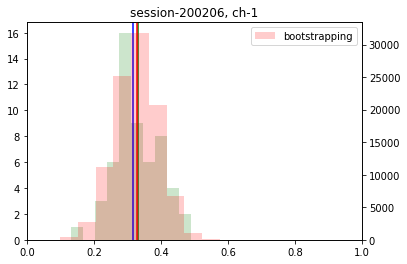

In [68]:
ch = 1
fig, ax1 = plt.subplots()
ax1.hist(dist_app[:, ch], color='green', label='55 samples', alpha=0.2)
ax1.axvline(np.mean(dist_app[:, ch]), color='green')
ax1.axvline(np.mean(norm_app_old[:, ch]), color='blue')
ax2 = ax1.twinx()
ax2.hist(norm_dist[:, ch], color='red', label='bootstrapping', alpha=0.2)
ax2.axvline(np.mean(norm_dist[:, ch]), color='red')
plt.xlim([0,1])
plt.title(f"session-{session}, ch-{ch}")
plt.legend(loc='best')
plt.show()

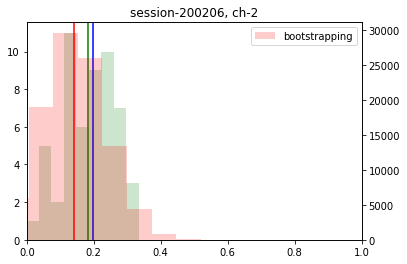

In [69]:
ch = 2
fig, ax1 = plt.subplots()
ax1.hist(dist_app[:, ch], color='green', label='55 samples', alpha=0.2)
ax1.axvline(np.mean(dist_app[:, ch]), color='green')
ax1.axvline(np.mean(norm_app_old[:, ch]), color='blue')
ax2 = ax1.twinx()
ax2.hist(norm_dist[:, ch], color='red', label='bootstrapping', alpha=0.2)
ax2.axvline(np.mean(norm_dist[:, ch]), color='red')
plt.xlim([0,1])
plt.title(f"session-{session}, ch-{ch}")
plt.legend(loc='best')
plt.show()

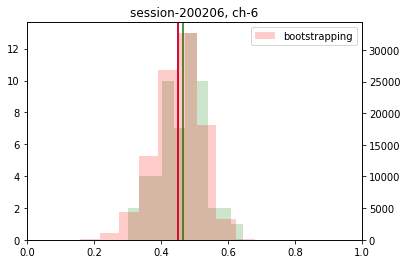

In [70]:
ch = 6
fig, ax1 = plt.subplots()
ax1.hist(dist_app[:, ch], color='green', label='55 samples', alpha=0.2)
ax1.axvline(np.mean(dist_app[:, ch]), color='green')
ax1.axvline(np.mean(norm_app_old[:, ch]), color='blue')
ax2 = ax1.twinx()
ax2.hist(norm_dist[:, ch], color='red', label='bootstrapping', alpha=0.2)
ax2.axvline(np.mean(norm_dist[:, ch]), color='red')
plt.xlim([0,1])
plt.title(f"session-{session}, ch-{ch}")
plt.legend(loc='best')
plt.show()

##### 100k runs of random concatenation vs 55 runs of fixed concatenation
Both the distributions are using the long (all test sentences concatenated) sequence spikes.
Red colored distributions for 100k runs with random concatanation order at each run
Green colored distributions for 11choose2=55 runs with fixed concatanation order at each run

In [ ]:
norm_dist_bootstrap = []
norm_dist_fixed_concate = []


In [11]:
session_dists_list = []
sessions = norm_obj.metadata.get_sessions_for_recording_config()
for session in sessions:
	norm_dist = get_norm_dist_fixed_concate(session, 50, 0)
	session_dists_list.append(norm_dist)
norm_dist_fixed_concate = np.concatenate(session_dists_list , axis=1)

Loading Neural data for session: 180413 ... Done.
Loading Neural data for session: 180420 ... Done.
Loading Neural data for session: 180501 ... Done.
Loading Neural data for session: 180502 ... Done.
Loading Neural data for session: 180613 ... Done.
Loading Neural data for session: 180622 ... Done.
Loading Neural data for session: 180627 ... Done.
Loading Neural data for session: 180717 ... Done.
Loading Neural data for session: 180719 ... Done.
Loading Neural data for session: 180720 ... Done.
Loading Neural data for session: 180724 ... Done.
Loading Neural data for session: 180728 ... Done.
Loading Neural data for session: 180730 ... Done.
Loading Neural data for session: 180731 ... Done.
Loading Neural data for session: 180807 ... Done.
Loading Neural data for session: 180808 ... Done.
Loading Neural data for session: 180810 ... Done.
Loading Neural data for session: 180814 ... Done.
Loading Neural data for session: 190604 ... Done.
Loading Neural data for session: 190605 ... Done.


In [41]:
fixed_concate_mean = np.mean(norm_dist_fixed_concate, axis=0)
fixed_concate_std = np.std(norm_dist_fixed_concate, axis=0)

In [ ]:
bin_width = 50
norm_dist_bootstrap = []
for session in sessions:
	norm_dist = norm_obj.get_normalizer_for_session_random_pairs(
		session=session, bin_width=bin_width
	)
	norm_dist_bootstrap.append(norm_dist)
# norm_dist_bootstrap = np.concatenate(norm_dist_bootstrap, axis=1)

In [37]:
norm_dist_bootstrap_means = []
norm_dist_bootstrap_std = []
for i, dist in enumerate(norm_dist_bootstrap):
	if np.isnan(np.mean(dist)):
		print(f"Session at index {i} has nan in the dist.")
	else:
		norm_dist_bootstrap_means.append(np.mean(dist, axis=0))
		norm_dist_bootstrap_std.append(np.std(dist, axis=0))

norm_dist_bootstrap_means = np.concatenate(norm_dist_bootstrap_means)
norm_dist_bootstrap_std = np.concatenate(norm_dist_bootstrap_std)

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Session at index 16 has nan in the dist.
Session at index 39 has nan in the dist.


(-0.05, 0.2)

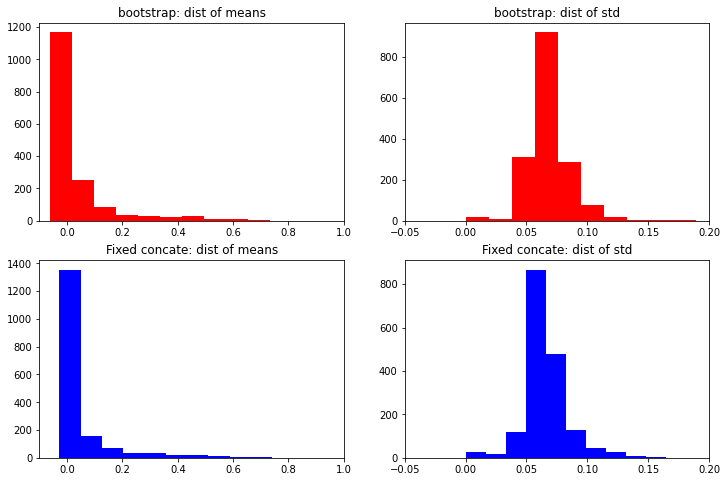

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
color='red'
i = 0
axes[i//2,i%2].hist(norm_dist_bootstrap_means, color=color)
axes[i//2,i%2].set_title(f"bootstrap: dist of means")
axes[i//2,i%2].set_xlim([-0.1,1])
i=1
axes[i//2,i%2].hist(norm_dist_bootstrap_std, color=color)
axes[i//2,i%2].set_title(f"bootstrap: dist of std")
axes[i//2,i%2].set_xlim([-0.05,0.2])
i=2
color='blue'
axes[i//2,i%2].hist(fixed_concate_mean, color=color)
axes[i//2,i%2].set_title(f"Fixed concate: dist of means")
axes[i//2,i%2].set_xlim([-0.1,1])
i=3
axes[i//2,i%2].hist(fixed_concate_std, color=color)
axes[i//2,i%2].set_title(f"Fixed concate: dist of std")
axes[i//2,i%2].set_xlim([-0.05,0.2])

array([ 0.00695058,  0.00682303,  0.00614413, ...,  0.00330661,
       -0.00449291,  0.00251229])

In [3]:
session = 200313 
session = 180810
bin_width = 20
norm_dist = norm_obj.get_normalizer_for_session_random_pairs(
		session=session, bin_width=bin_width
	)
np.mean(norm_dist)

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan

In [8]:
from auditory_cortex.io_utils import io
bin_width = 100
delay = 0
norm_dict_all_sessions = io.read_normalizer_distribution(
                bin_width=bin_width, delay=delay, method='random'
                )
len(list(norm_dict_all_sessions.keys()))

28

In [5]:
a = np.zeros(10)
b = np.random.randn(10)
cc = np.corrcoef(a,b)[0,1]
if np.isnan(cc):
	print(f"nAn")

nAn


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [25]:
norm_dist_bootstrap_means.shape

(1718,)

In [ ]:
norm_dist_fixed_concate

In [19]:
norm_dist_bootstrap[3].shape

(100000, 16)

##### sessions with nans

In [56]:
session = 200313 
# session = 180810
dataset = norm_obj._get_dataset_obj(session)
all_trial_spikes = dataset.get_repeated_trials(
		bin_width=bin_width, delay=0
		)

Loading Neural data for session: 200313 ... Done.


In [53]:
all_trial_spikes.shape

(11, 326, 16)

In [6]:
session = 200313 
# session = 180810
bin_width = 20
norm_dist = norm_obj.get_normalizer_for_session_random_pairs(
		session=session, bin_width=bin_width
	)
norm_dist.shape

(1, 63)

In [5]:
# session = 200313 
session = 180810
bin_width = 20
norm_dist = norm_obj.get_normalizer_for_session_random_pairs(
		session=session, bin_width=bin_width
	)
norm_dist.shape

(1, 16)

In [10]:
null_dist = norm_obj.get_normalizer_null_dist_using_poisson(bin_width=50, itr=10000, force_redo=True)

Poisson Process: Null distribution for bin_width: 50, spike_rate: 50...
Null dist. poisson saved to: /scratch/gilbreth/ahmedb/cache/normalizers/null_distribution/normalizers_null_dist_poisson_bw_50ms_spike_rate_50hz.pkl


In [11]:
norm_obj.metadata.get_all_available_sessions()

(41,)

### normalizer: bootsrapping using random pairing

### computing the distriubtion of normalizer (repeatability correaltions)

In [3]:
session = 200206
bin_width = 50
delay=0

In [4]:
dataset = norm_obj._get_dataset_obj(session)

sent_wise_repeated_spikes = {}
for sent in norm_obj.metadata.test_sent_IDs:
	sent_wise_repeated_spikes[sent] = dataset.get_repeated_trials(
		sents=[sent], bin_width=bin_width, delay=delay
		)

Loading Neural data for session: 200206 ... Done.


In [6]:
for sent, spikes in sent_wise_repeated_spikes.items():
	print(f"For sent-{sent}, {spikes.shape}")

For sent-12, (11, 27, 64)
For sent-13, (11, 35, 64)
For sent-32, (11, 31, 64)
For sent-43, (11, 27, 64)
For sent-56, (11, 35, 64)
For sent-163, (11, 38, 64)
For sent-212, (11, 30, 64)
For sent-218, (11, 30, 64)
For sent-287, (11, 26, 64)
For sent-308, (11, 47, 64)


In [16]:
n = 1
num_channels = next(iter(sent_wise_repeated_spikes.values())).shape[-1]
trials_corr = np.zeros((n, num_channels))
trial_ids = np.arange(11)
for t in range(n):
	long_seq1 = []
	long_seq2 = []

	for sent, spikes in sent_wise_repeated_spikes.items():
		tr1, tr2 = np.random.choice(trial_ids, size=2, replace=False)
		print(f"For sent-{sent}, trails: {tr1}, {tr2}")

		long_seq1.append(spikes[tr1])
		long_seq2.append(spikes[tr2])
	long_seq1 = np.concatenate(long_seq1, axis=0)
	long_seq2 = np.concatenate(long_seq2, axis=0)


For sent-12, trails: 2, 3
For sent-13, trails: 5, 6
For sent-32, trails: 8, 4
For sent-43, trails: 6, 4
For sent-56, trails: 7, 2
For sent-163, trails: 10, 8
For sent-212, trails: 3, 4
For sent-218, trails: 4, 3
For sent-287, trails: 5, 10
For sent-308, trails: 5, 8


In [18]:
n = 2

num_channels = next(iter(sent_wise_repeated_spikes.values())).shape[-1]
trials_corr = np.zeros((n, num_channels))
trial_ids = np.arange(11)
for t in range(n):
	long_seq1 = []
	long_seq2 = []

	for sent, spikes in sent_wise_repeated_spikes.items():
		tr1, tr2 = np.random.choice(trial_ids, size=2, replace=False)

		long_seq1.append(spikes[tr1])
		long_seq2.append(spikes[tr2])
	long_seq1 = np.concatenate(long_seq1, axis=0)
	long_seq2 = np.concatenate(long_seq2, axis=0)

	for ch in range(num_channels):
		trials_corr[t, ch] = np.corrcoef(
			long_seq1[...,ch].squeeze(), long_seq2[...,ch].squeeze()
			)[0,1]

In [20]:
trials_corr[...,ch]

array([0.57055951, 0.50598528])

In [12]:
ch = 32
long_seq1[:10, ch]

array([ 0.,  0.,  0.,  1.,  8.,  0., 10.,  0.,  1.,  0.])

In [13]:
long_seq2[:10, ch]

array([ 1.,  0.,  0.,  0.,  9.,  0., 11.,  0.,  2.,  0.])

#### Normalizers comparison: Random Pairs (100k) vs All Possible Pairs (app)

In [ ]:
session = 200206
bin_width = 50

norm_100k = norm_obj.get_normalizer_for_session_random_pairs(
	session=session, bin_width=bin_width, force_redo=True
)



In [ ]:
norm_100k.shape

(550, 64)

In [3]:
session = 200206
bin_width = 50
norm_dist_100k = []
norm_dist_app = []
sessions = norm_obj.metadata.get_all_available_sessions()
for session in sessions:
	norm_100k = norm_obj.get_normalizer_for_session(
		session=session, bin_width=bin_width
	)

	norm_app = norm_obj.get_normalizer_for_session_app(
		session=session, bin_width=bin_width
	)

	norm_dist_100k.extend(list(norm_100k['normalizer']))
	norm_dist_app.extend(list(np.median(norm_app, axis=0)))


Text(0.5, 1.0, 'new method, mean: 0.023, var: 0.015')

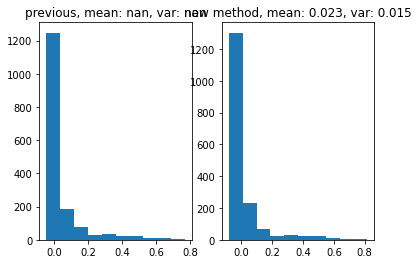

In [3]:
fig, ax = plt.subplots(ncols=2)

ax[0].hist(norm_dist_100k)
ax[0].set_title(f"previous, mean: {np.mean(norm_dist_100k):.3f}, var: {np.var(norm_dist_100k):.3f}")

ax[1].hist(norm_dist_app)
ax[1].set_title(f"new method, mean: {np.mean(norm_dist_app):.3f}, var: {np.var(norm_dist_app):.3f}")


In [22]:
np.sum(np.isnan(norm_dist_100k))

77

In [21]:
if np.mean(norm_dist_100k) < 0.06:
    print("Yes")
elif np.mean(norm_dist_100k) > 0.06:
    print(f"No") 

#### method 1

In [3]:
session = 200206
bin_width = 20
normalizer_med, normalizer_dist = norm._compute_normalizer(
    session=session,
    bin_width=bin_width,
)

Loading Neural data for session: 200206 ... Done.


Text(0.5, 1.0, 'ch-32, median: 0.73')

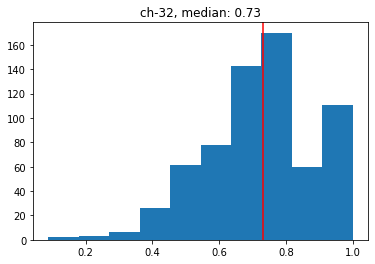

In [8]:
ch = 32
plt.hist(normalizer_dist[:,ch])
plt.axvline(np.median(normalizer_dist[:,ch]), color='r')
plt.title(f"ch-{ch}, median: {np.median(normalizer_dist[:,ch]):.2f}")

Text(0.5, 1.0, 'ch-62, median: 0.63')

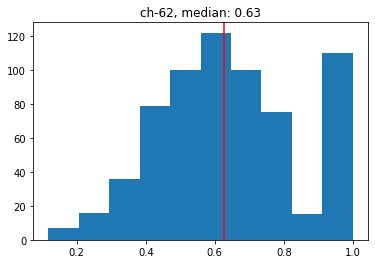

In [9]:
ch = 62
plt.hist(normalizer_dist[:,ch])
plt.axvline(np.median(normalizer_dist[:,ch]), color='r')
plt.title(f"ch-{ch}, median: {np.median(normalizer_dist[:,ch]):.2f}")

#### method 2

In [2]:
session = 200206
bin_width = 50
norm_dist = norm_obj.get_normalizer_for_session_app(
    session=session, bin_width=bin_width 
)

Text(0.5, 1.0, 'ch-62, median: 0.73')

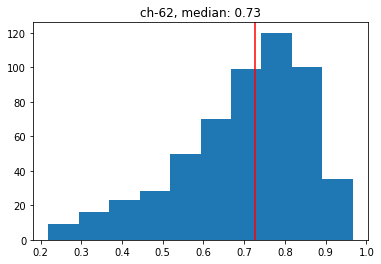

In [3]:
ch = 62
plt.hist(norm_dist[:,ch])
plt.axvline(np.median(norm_dist[:,ch]), color='r')
plt.title(f"ch-{ch}, median: {np.median(norm_dist[:,ch]):.2f}")

Text(0.5, 1.0, 'ch-32, median: 0.82')

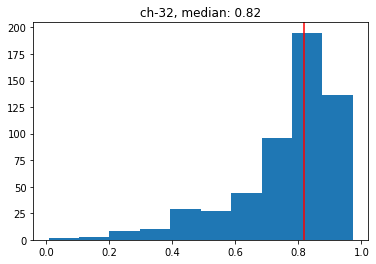

In [5]:
ch = 32
plt.hist(norm_dist[:,ch])
plt.axvline(np.median(norm_dist[:,ch]), color='r')
plt.title(f"ch-{ch}, median: {np.median(norm_dist[:,ch]):.2f}")

#### Null Distribution: 


In [2]:
bin_width = 50
null_dist = norm_obj.get_normalizer_null_dist_using_poisson(
            bin_width=bin_width
            )

0.093


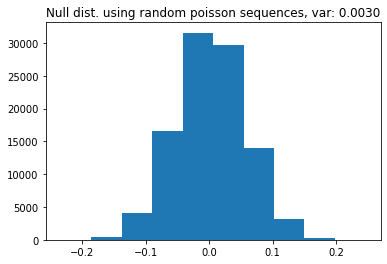

In [3]:
plt.hist(null_dist)
plt.title(f"Null dist. using random poisson sequences, var: {np.var(null_dist):.4f}")
print(f"{np.percentile(null_dist, 95):.3f}")

##### Null dist. using ranomly shuffled spikes...

In [2]:
bin_width = 50
sig_sess_and_channels = norm_obj.get_significant_sessions_and_channels_using_shifts_null(
    bin_width=bin_width, p_threshold=0.01, # force_redo=True
)
sig_neurons_shifts_p_01 = []
for sess in sig_sess_and_channels.keys():

	for ch in sig_sess_and_channels[sess]:
		ch = int(ch)
		sig_neurons_shifts_p_01.append(f"{sess}_{ch:02d}") 

sig_neurons_shifts_p_01 = np.array(sig_neurons_shifts_p_01)

Sigificant sessions/channels data not found: for bin-width 50ms.


/home/ahmedb/projects/Wav2Letter/Auditory_Cortex/auditory_cortex/neural_data/normalizer.py:517: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  pvalue = scipy.stats.ttest_ind(


Total significant neurons at 50ms bin width = 615
Path not found, creating directories...
Sigificant sessions/channels saved to: /depot/jgmakin/data/auditory_cortex/results/normalizers/significant_neurons/using_shifts_null/significant_sessions_and_channels_bw_50ms_pvalue_0.01.pkl


In [3]:
bin_width = 50
sig_sess_and_channels = norm_obj.get_significant_sessions_and_channels_using_shifts_null(
    bin_width=bin_width, p_threshold=0.05, # force_redo=True
)
sig_neurons_shifts_p_05 = []
for sess in sig_sess_and_channels.keys():

	for ch in sig_sess_and_channels[sess]:
		ch = int(ch)
		sig_neurons_shifts_p_05.append(f"{sess}_{ch:02d}") 

sig_neurons_shifts_p_05 = np.array(sig_neurons_shifts_p_05)

Sigificant sessions/channels data not found: for bin-width 50ms.


/home/ahmedb/projects/Wav2Letter/Auditory_Cortex/auditory_cortex/neural_data/normalizer.py:517: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  pvalue = scipy.stats.ttest_ind(


Total significant neurons at 50ms bin width = 741
Sigificant sessions/channels saved to: /depot/jgmakin/data/auditory_cortex/results/normalizers/significant_neurons/using_shifts_null/significant_sessions_and_channels_bw_50ms_pvalue_0.05.pkl


In [30]:
extra_neurons = sig_neurons_shifts_p_01[np.isin(sig_neurons_shifts_p_01, sig_neurons_shifts_p_05, invert=True)]
len(extra_neurons)

0

In [5]:

bin_width = 50
sig_sess_and_channels = norm_obj.get_significant_sessions_and_channels_using_poisson_null(
    bin_width=bin_width, p_threshold=0.05, # force_redo=True
)
sig_neurons_poisson_p_05 = []
for sess in sig_sess_and_channels.keys():

	for ch in sig_sess_and_channels[sess]:
		ch = int(ch)
		sig_neurons_poisson_p_05.append(f"{sess}_{ch:02d}") 

sig_neurons_poisson_p_05 = np.array(sig_neurons_poisson_p_05)

Sigificant sessions/channels data not found: for bin-width 50ms.
Total significant neurons at 50ms bin width = 602
Path not found, creating directories...
Sigificant sessions/channels saved to: /depot/jgmakin/data/auditory_cortex/results/normalizers/significant_neurons/using_poisson_null/significant_sessions_and_channels_bw_50ms_pvalue_0.05.pkl


In [6]:
bin_width = 50
sig_sess_and_channels = norm_obj.get_significant_sessions_and_channels_using_poisson_null(
    bin_width=bin_width, p_threshold=0.01, # force_redo=True
)
sig_neurons_poisson_p_01 = []
for sess in sig_sess_and_channels.keys():

	for ch in sig_sess_and_channels[sess]:
		ch = int(ch)
		sig_neurons_poisson_p_01.append(f"{sess}_{ch:02d}") 

sig_neurons_poisson_p_01 = np.array(sig_neurons_poisson_p_01)

Sigificant sessions/channels data not found: for bin-width 50ms.
Total significant neurons at 50ms bin width = 514
Sigificant sessions/channels saved to: /depot/jgmakin/data/auditory_cortex/results/normalizers/significant_neurons/using_poisson_null/significant_sessions_and_channels_bw_50ms_pvalue_0.01.pkl


In [31]:
extra_neurons_poisson = sig_neurons_poisson_p_01[np.isin(sig_neurons_poisson_p_01, sig_neurons_poisson_p_05, invert=True)]
len(extra_neurons_poisson)

0

In [32]:
extra = sig_neurons_poisson_p_05[np.isin(sig_neurons_poisson_p_05, sig_neurons_shifts_p_01, invert=True)]
len(extra)

59

In [33]:
len(sig_neurons_poisson_p_05)

602

In [34]:
extra = sig_neurons_shifts_p_01[np.isin(sig_neurons_shifts_p_01, sig_neurons_poisson_p_05, invert=True)]
len(extra)

72

In [44]:
for sess in sig_sess_and_channels.keys():
    num_channels = len(sig_sess_and_channels[sess])
    print(f"For sess-{sess}, sig channels = {num_channels}")

For sess-180413, sig channels = 1
For sess-180501, sig channels = 3
For sess-180502, sig channels = 2
For sess-180613, sig channels = 6
For sess-180622, sig channels = 5
For sess-180627, sig channels = 5
For sess-180717, sig channels = 8
For sess-180719, sig channels = 13
For sess-180720, sig channels = 14
For sess-180724, sig channels = 2
For sess-180728, sig channels = 6
For sess-180730, sig channels = 7
For sess-180731, sig channels = 15
For sess-180807, sig channels = 15
For sess-180808, sig channels = 16
For sess-180814, sig channels = 33
For sess-190604, sig channels = 1
For sess-190606, sig channels = 37
For sess-190703, sig channels = 5
For sess-190726, sig channels = 10
For sess-190801, sig channels = 3
For sess-191113, sig channels = 35
For sess-191115, sig channels = 52
For sess-191121, sig channels = 23
For sess-191125, sig channels = 34
For sess-191206, sig channels = 33
For sess-191209, sig channels = 3
For sess-191210, sig channels = 42
For sess-191211, sig channels = 1


In [54]:
session = 200213
bin_width = 50
p_threshold = 0.01

norm_dist = norm_obj.get_normalizer_for_session_app(
                session=session, bin_width=bin_width 
            )

null_dist = norm_obj.get_normalizer_null_dist_using_random_shifts(
    session, bin_width=bin_width
)

In [56]:
sig_channels = []
other_channels = []
for ch in range(norm_dist.shape[1]):
    pvalue = scipy.stats.ttest_ind(
        norm_dist[:,ch], null_dist[:,ch], equal_var=False, alternative='greater'
        ).pvalue
    if pvalue < p_threshold:    
        sig_channels.append(ch)
    else:
        other_channels.append(ch)
        # print(f"ch-{ch}, median: {np.median(null_dist[:,ch])}")
    
print(f"Number of significant channels: {len(sig_channels)}")
print(f"Other channels: {len(other_channels)}")

Number of significant channels: 25
Other channels: 39


0.103
ch-32 is significant..


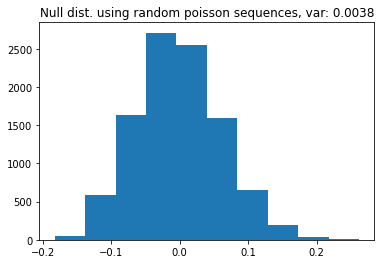

In [47]:
ch = 32
p_threshold = 0.01
plt.hist(null_dist[:,ch])
plt.title(f"Null dist. using random poisson sequences, var: {np.var(null_dist[:,ch]):.4f}")
print(f"{np.percentile(null_dist[:,ch], 95):.3f}")
pvalue = scipy.stats.ttest_ind(
        norm_dist[:,ch], null_dist[:,ch], equal_var=False, alternative='greater'
        ).pvalue
if pvalue < p_threshold:    
    # total_sig_channels += 1
    print(f"ch-{ch} is significant..")

In [7]:
null_dist[:,ch].shape

(90929,)

0.108
ch-62 is significant..


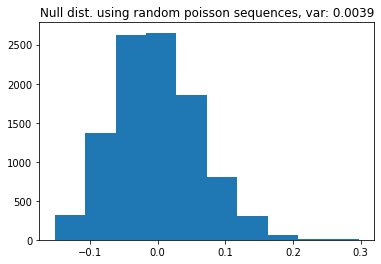

In [48]:
ch = 62
p_threshold = 0.01
plt.hist(null_dist[:,ch])
plt.title(f"Null dist. using random poisson sequences, var: {np.var(null_dist[:,ch]):.4f}")
print(f"{np.percentile(null_dist[:,ch], 95):.3f}")
pvalue = scipy.stats.ttest_ind(
        norm_dist[:,ch], null_dist[:,ch], equal_var=False, alternative='greater'
        ).pvalue
if pvalue < p_threshold:    
    # total_sig_channels += 1
    print(f"ch-{ch} is significant..")

ch-57 is significant..


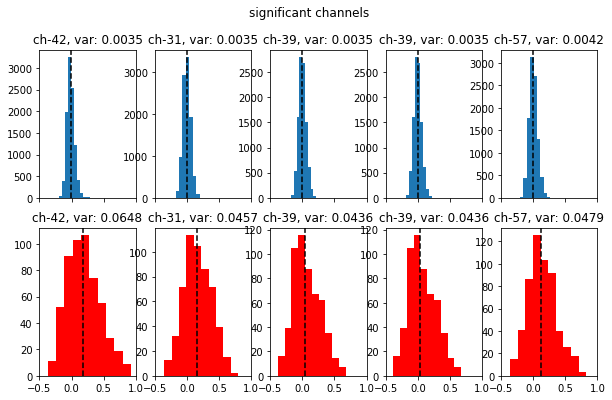

In [57]:
chs = np.random.choice(sig_channels, size=5)
# ch = 0
p_threshold = 0.05
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

for i, ch in enumerate(chs):

	ax[0, i].hist(null_dist[:,ch])
	ax[0, i].set_title(f"ch-{ch}, var: {np.var(null_dist[:,ch]):.4f}")
	ax[0, i].set_xlim([-0.5, 1.0])
	ax[0, i].set_xticklabels([])
	ax[0, i].axvline(x=np.median(null_dist[:,ch]), color='k', linestyle='--')

	ax[1,i].hist(norm_dist[:,ch], color='r')
	ax[1,i].set_title(f"ch-{ch}, var: {np.var(norm_dist[:,ch]):.4f}")
	ax[1,i].set_xlim([-0.5, 1.0])
	ax[1, i].axvline(x=np.median(norm_dist[:,ch]), color='k', linestyle='--')
# print(f"{np.percentile(null_dist[:,ch], 95):.3f}")
plt.suptitle(f"significant channels")
pvalue = scipy.stats.ttest_ind(
        norm_dist[:,ch], null_dist[:,ch], equal_var=False, alternative='greater'
        ).pvalue
if pvalue < p_threshold:    
    # total_sig_channels += 1
    print(f"ch-{ch} is significant..")

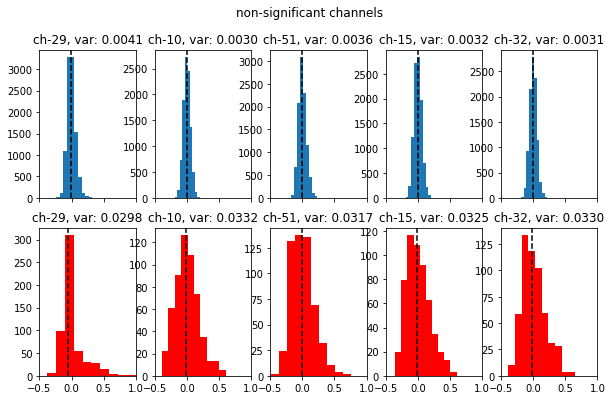

In [58]:
chs = np.random.choice(other_channels, size=5)
# ch = 0
p_threshold = 0.05
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

for i, ch in enumerate(chs):

	ax[0, i].hist(null_dist[:,ch])
	ax[0, i].set_title(f"ch-{ch}, var: {np.var(null_dist[:,ch]):.4f}")
	ax[0, i].set_xlim([-0.5, 1.0])
	ax[0, i].set_xticklabels([])
	ax[0, i].axvline(x=np.median(null_dist[:,ch]), color='k', linestyle='--')

	ax[1,i].hist(norm_dist[:,ch], color='r')
	ax[1,i].set_title(f"ch-{ch}, var: {np.var(norm_dist[:,ch]):.4f}")
	ax[1,i].set_xlim([-0.5, 1.0])
	ax[1, i].axvline(x=np.median(norm_dist[:,ch]), color='k', linestyle='--')
# print(f"{np.percentile(null_dist[:,ch], 95):.3f}")
plt.suptitle(f"non-significant channels")
pvalue = scipy.stats.ttest_ind(
        norm_dist[:,ch], null_dist[:,ch], equal_var=False, alternative='greater'
        ).pvalue
if pvalue < p_threshold:    
    # total_sig_channels += 1
    print(f"ch-{ch} is significant..")

In [54]:
np.mean(null_dist[:,59])

nan

In [55]:
np.median(null_dist[:,59])

nan

In [66]:
np.where(np.isnan(null_dist))[0]

array([    3,     3,     3, ..., 99984, 99984, 99984])

In [76]:

null_dist = np.delete(null_dist, np.where(np.isnan(null_dist))[0], axis=0)

In [71]:
out.shape

(90943, 64)

In [74]:
np.sum(np.isnan(out))

0

In [58]:
null_dist = np.nan_to_num(null_dist)

In [59]:
ch = 59
pvalue = scipy.stats.ttest_ind(
        norm_dist[:,ch], null_dist[:,ch], equal_var=False, alternative='greater'
        ).pvalue
print(pvalue)

1.1652056989886051e-195


ch-59 is significant..


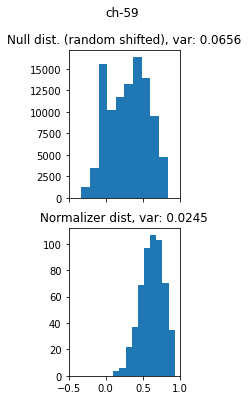

In [62]:
ch = 59
p_threshold = 0.05
fig, ax = plt.subplots(nrows=2, figsize=(2, 6))
ax[0].hist(null_dist[:,ch])
ax[0].set_title(f"Null dist. (random shifted), var: {np.var(null_dist[:,ch]):.4f}")
ax[0].set_xlim([-0.5, 1.0])
ax[0].set_xticklabels([])
ax[1].hist(norm_dist[:,ch])
ax[1].set_title(f"Normalizer dist, var: {np.var(norm_dist[:,ch]):.4f}")
ax[1].set_xlim([-0.5, 1.0])
# print(f"{np.percentile(null_dist[:,ch], 95):.3f}")
plt.suptitle(f"ch-{ch}")
pvalue = scipy.stats.ttest_ind(
        norm_dist[:,ch], null_dist[:,ch], equal_var=False, alternative='greater'
        ).pvalue
if pvalue < p_threshold:    
    # total_sig_channels += 1
    print(f"ch-{ch} is significant..")

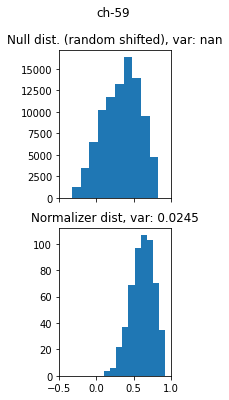

In [75]:
ch = 59
p_threshold = 0.05
fig, ax = plt.subplots(nrows=2, figsize=(2, 6))
ax[0].hist(null_dist[:,ch])
ax[0].set_title(f"Null dist. (random shifted), var: {np.var(null_dist[:,ch]):.4f}")
ax[0].set_xlim([-0.5, 1.0])
ax[0].set_xticklabels([])
ax[1].hist(norm_dist[:,ch])
ax[1].set_title(f"Normalizer dist, var: {np.var(norm_dist[:,ch]):.4f}")
ax[1].set_xlim([-0.5, 1.0])
# print(f"{np.percentile(null_dist[:,ch], 95):.3f}")
plt.suptitle(f"ch-{ch}")
pvalue = scipy.stats.ttest_ind(
        norm_dist[:,ch], null_dist[:,ch], equal_var=False, alternative='greater'
        ).pvalue
if pvalue < p_threshold:    
    # total_sig_channels += 1
    print(f"ch-{ch} is significant..")

ch-59 is significant..


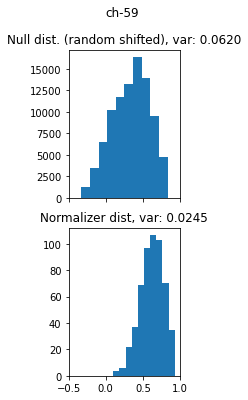

In [77]:
ch = 59
p_threshold = 0.05
fig, ax = plt.subplots(nrows=2, figsize=(2, 6))
ax[0].hist(null_dist[:,ch])
ax[0].set_title(f"Null dist. (random shifted), var: {np.var(null_dist[:,ch]):.4f}")
ax[0].set_xlim([-0.5, 1.0])
ax[0].set_xticklabels([])
ax[1].hist(norm_dist[:,ch])
ax[1].set_title(f"Normalizer dist, var: {np.var(norm_dist[:,ch]):.4f}")
ax[1].set_xlim([-0.5, 1.0])
# print(f"{np.percentile(null_dist[:,ch], 95):.3f}")
plt.suptitle(f"ch-{ch}")
pvalue = scipy.stats.ttest_ind(
        norm_dist[:,ch], null_dist[:,ch], equal_var=False, alternative='greater'
        ).pvalue
if pvalue < p_threshold:    
    # total_sig_channels += 1
    print(f"ch-{ch} is significant..")

ch-0, median: 0.24492117715969988
ch-2, median: 0.2304188860510819
ch-7, median: 0.3116716629326333
ch-8, median: 0.340754336256977
ch-9, median: 0.29289311349130376
ch-12, median: 0.3244767486863053
ch-39, median: 0.33700077941023704
ch-41, median: 0.3208087938080317
ch-42, median: 0.2396602842760205
Number of significant channels: 55
Other channels: 9


In [16]:
other_channels

[0,
 2,
 7,
 8,
 9,
 12,
 39,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61]

#### Significant sessions/channels...

In [2]:
bin_width=50
p_threshold = 0.01
significant_sessions_and_channels = norm_obj.get_significant_sessions_and_channels_using_shifts_null(
    bin_width=bin_width, p_threshold = p_threshold,
    )

In [17]:
recording_configs = ['c_LH', 'c_RH', 'b_RH', 'f_RH']
sub_wise_sig = []
for sub in recording_configs:
	sub_sess = {}
	sessions = norm_obj.metadata.get_sessions_for_recording_config(sub)
	for sess in sessions:
		sess = str(sess)
		if sess in significant_sessions_and_channels.keys():
			sub_sess[sess] = significant_sessions_and_channels[sess]
			
	sub_wise_sig.append(sub_sess)
        

In [19]:
grand_total_sessions = 0
grand_total_neurons = 0
for i, sub in enumerate(recording_configs):
	sub_data = sub_wise_sig[i]
	sig_neurons = 0
	sig_sessions = 0
	for sess in sub_data.keys():
		sig_sessions += 1
		sig_neurons += len(sub_data[sess])
	print(f"For {sub}, sig_sessions: {sig_sessions}, sig_neurons: {sig_neurons}")
	grand_total_sessions += sig_sessions
	grand_total_neurons += sig_neurons
print(f"Overall sig: \n sessions= {grand_total_sessions}, neurons = {grand_total_neurons}")

For c_LH, sig_sessions: 11, sig_neurons: 335
For c_RH, sig_sessions: 11, sig_neurons: 113
For b_RH, sig_sessions: 10, sig_neurons: 94
For f_RH, sig_sessions: 5, sig_neurons: 73
Overall sig: 
 sessions= 37, neurons = 615


In [15]:
sub_wise_sig[2]

{}

In [6]:
sessions.shape

(11,)

In [3]:
len(significant_sessions_and_channels)

37

In [4]:
bin_width=50
p_threshold = 0.01
significant_sessions_and_channels = norm_obj.get_significant_sessions_and_channels_using_poisson_null(
    bin_width=bin_width, p_threshold = p_threshold, force_redo=True
    )

Total significant neurons at 50ms bin width = 602
Sigificant sessions/channels saved to: /depot/jgmakin/data/auditory_cortex/results/normalizers/significant_neurons/significant_sessions_and_channels_bw_50ms_pvalue_0.05.pkl


In [64]:
bin_width=50
p_threshold = 0.01
significant_sessions_and_channels = norm_obj.get_significant_sessions_and_channels_using_poisson_null(
            bin_width=bin_width, p_threshold=p_threshold 
            )
total_channels = 0
for sess in significant_sessions_and_channels.keys():
    total_channels += len(significant_sessions_and_channels[sess])
print(total_channels)

514


In [5]:
bin_width=50
p_threshold = 0.01
significant_sessions_and_channels = norm_obj.get_significant_sessions_and_channels_using_poisson_null(
    bin_width=bin_width, p_threshold = p_threshold, force_redo=True
    )

Total significant neurons at 50ms bin width = 514
Sigificant sessions/channels saved to: /depot/jgmakin/data/auditory_cortex/results/normalizers/significant_neurons/significant_sessions_and_channels_bw_50ms_pvalue_0.01.pkl


NameError: name 'significant_sessions_and_channels' is not defined

In [3]:
total_channels = 0
for sess in significant_sessions_and_channels.keys():
    total_channels += len(significant_sessions_and_channels[sess])
print(total_channels)

587


In [9]:
sessions = list(significant_sessions_and_channels.keys())
session = sessions[0]
norm_dist = norm_obj.get_normalizer_for_session_app(
                session=session, bin_width=bin_width 
            )

In [10]:
significant_sessions_and_channels[session]

[11]

In [11]:
print(session)

180413


In [13]:
np.mean(norm_dist, axis=0)

array([ 0.00619074,  0.01806592, -0.00173108, -0.0086964 , -0.00392459,
        0.00373932,  0.00083708,  0.0051285 ,  0.01192225, -0.00123399,
       -0.00067504,  0.03085115,  0.010098  ,  0.00447962, -0.00602105,
        0.00439548])

In [6]:
session = 200206
bin_width = 50
norm_dist = norm_obj.get_normalizer_for_session_app(
    session=session, bin_width=bin_width 
)
ch = 32
test_dist = norm_dist[:,ch]
scipy.stats.ttest_1samp(test_dist, 0).pvalue

0.0

In [7]:
total_channels = 0
sessions = norm_obj.metadata.get_all_available_sessions()
for session in sessions:
    num_channels = norm_obj.metadata.get_num_channels(session)
    total_channels += num_channels

print(total_channels)

1718


##### one-sample t-test...
comparing normalizer distribution against 0.

In [18]:
bin_width = 50
p_threshold = 0.05
total_sig_channels = 0
sig_session_channel_list1 = []
smallest_normalizer = 1
# smallest_normalizer_ch
sessions = norm_obj.metadata.get_all_available_sessions()
for session in sessions:
    # session = 200206
    norm_dist = norm_obj.get_normalizer_for_session_app(
        session=session, bin_width=bin_width 
    )
    num_channels = norm_obj.metadata.get_num_channels(session)
    for ch in range(num_channels):
        # ch = 32
        
        pvalue = scipy.stats.ttest_1samp(norm_dist[:,ch], 0, alternative='greater').pvalue
        if pvalue < p_threshold:
            sig_session_channel_list1.append(f"{session}-{ch:02d}")
            if np.median(norm_dist[:,ch]) < smallest_normalizer:
                smallest_normalizer = np.median(norm_dist[:,ch])
                smallest_normalizer_ch = f"{session}-{ch:02d}"

print(f"Total significant channels: {len(sig_session_channel_list1)}/{total_channels}")
print(f"Smallest median: {smallest_normalizer:.2f}")
print(smallest_normalizer_ch)

Total significant channels: 665/1718
Smallest median: -0.06
200205-17


In [15]:
session = 200205
bin_width = 50
norm_dist = norm_obj.get_normalizer_for_session_app(
    session=session, bin_width=bin_width 
)
ch = 17
print(np.median(norm_dist[:,ch]))
print(scipy.stats.ttest_1samp(norm_dist[:,ch], 0, alternative='greater').pvalue)

-0.05664529123725906
0.015401896695186884


(array([  3.,  52., 303.,  74.,  46.,  39.,  19.,   3.,  10.,   1.]),
 array([-0.39448313, -0.26593061, -0.13737808, -0.00882556,  0.11972696,
         0.24827949,  0.37683201,  0.50538454,  0.63393706,  0.76248959,
         0.89104211]),
 <BarContainer object of 10 artists>)

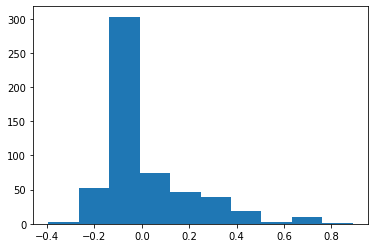

In [16]:
plt.hist(norm_dist[:,ch])

In [17]:
np.mean(norm_dist[:,ch])

0.01745487097210707

##### Two-sample t-test...
comparing normalizer distribution against 'null' distriubtion, Welch's test since variances of the two distributions can be different.. 

In [ ]:
def compute_significant_sessions_and_channels(bin_width = 50,
    spike_rate = 50,
    p_threshold = 0.05,
    ):
    """Provides significant channels for all the sessions, using
    two-sample Welch's t-test (assumes unqual variances).
    It test the null hypothesis that two distributions, distribution of repeatability
    correlations (normalizer dist.) and distribution of correlation between
    random poisson sequences (null dist.) have equal means.

    Args:
        bin_width: int = bin width in ms.
        spike_rate: int = spikes/second for poisson sequences in Null dist.
        p_threshold: float = threshold used to decide if null hypothesis if False.
    """
    total_sig_channels = 0
    sessions = norm_obj.metadata.get_all_available_sessions()
    significant_sessions_and_channels = {}
    null_dist = norm_obj.get_normalizer_null_dist_using_poisson(bin_width=bin_width, spike_rate=spike_rate)
    null_dist = np.array(null_dist)
    for session in sessions:
        norm_dist = norm_obj.get_normalizer_for_session_app(
            session=session, bin_width=bin_width 
        )
        num_channels = norm_obj.metadata.get_num_channels(session)
        for ch in range(num_channels):
            pvalue = scipy.stats.ttest_ind(
                norm_dist[:,ch], null_dist, equal_var=False, alternative='greater'
                ).pvalue
            # significance condition..
            if pvalue < p_threshold:    
                total_sig_channels += 1
                if session in significant_sessions_and_channels.keys():
                    significant_sessions_and_channels[session].append(ch)
                else:
                    significant_sessions_and_channels[session] = [ch]
    print(f"Total significant neurons at {bin_width}ms bin width = {total_sig_channels}")
    return significant_sessions_and_channels


In [30]:
bin_width = 50
# Null distribution
spike_rate = 50
p_threshold = 0.05
total_sig_channels = 0
sig_session_channel_list2 = []
sessions = norm_obj.metadata.get_all_available_sessions()
significant_sessions_and_channels = {}



null_dist = norm_obj.get_normalizer_null_dist_using_poisson(bin_width=bin_width, spike_rate=spike_rate)
null_dist = np.array(null_dist)
for session in sessions:
    # session = 200206
    norm_dist = norm_obj.get_normalizer_for_session_app(
        session=session, bin_width=bin_width 
    )
    num_channels = norm_obj.metadata.get_num_channels(session)
    for ch in range(num_channels):
        # ch = 32
        pvalue = scipy.stats.ttest_ind(norm_dist[:,ch], null_dist, equal_var=False,
                                       alternative='greater').pvalue
        if pvalue < p_threshold:
            if session in significant_sessions_and_channels.keys():
                significant_sessions_and_channels[session].append(ch)
            else:
                significant_sessions_and_channels[session] = [ch]




            sig_session_channel_list2.append(f"{session}-{ch:02d}")
            if np.median(norm_dist[:,ch]) < smallest_normalizer:
                smallest_normalizer = np.median(norm_dist[:,ch])
                smallest_normalizer_ch = f"{session}-{ch:02d}"


print(f"Total significant channels: {len(sig_session_channel_list2)}/{total_channels}")

Total significant channels: 602/1718


In [33]:
len(significant_sessions_and_channels.keys())

39

In [28]:
sig_session_channel_list1 = np.array(sig_session_channel_list1)
sig_session_channel_list2 = np.array(sig_session_channel_list2)

In [25]:
sig_session_channel_list1[np.isin(sig_session_channel_list1, sig_session_channel_list2, invert=True)].shape

(63,)

In [26]:
sig_session_channel_list2[np.isin(sig_session_channel_list2, sig_session_channel_list1, invert=True)].shape

(0,)

In [22]:
sig_session_channel_list2.shape

(602,)

##### medians of normalizer distributions...
Visualizing medians of normalizer distributions, to examine the range of values for correctiion factor (denominator)...

In [14]:
bin_width = 50
p_threshold = 0.05
total_sig_channels = 0
sig_session_channel_list = []
sessions = norm_obj.metadata.get_all_available_sessions()

norm_medians = []
for session in sessions:
    # session = 200206
    norm_dist = norm_obj.get_normalizer_for_session_app(
        session=session, bin_width=bin_width 
    )
    norm_medians.append(np.median(norm_dist, axis=0))
norm_medians = np.concatenate(norm_medians)

(array([953., 543.,  83.,  39.,  27.,  25.,  23.,   9.,   9.,   7.]),
 array([-0.05773503,  0.0325408 ,  0.12281662,  0.21309244,  0.30336826,
         0.39364409,  0.48391991,  0.57419573,  0.66447156,  0.75474738,
         0.8450232 ]),
 <BarContainer object of 10 artists>)

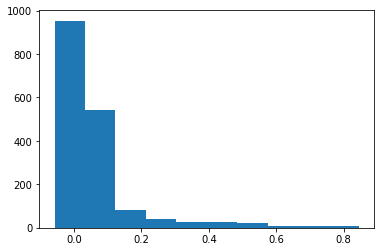

In [15]:
plt.hist(norm_medians)

In [36]:
print(f"Medians in the range..:")
th2 = 0.01
cumsum = 0
condition = (norm_medians<th2)
neurons_in_win = norm_medians[condition].size
cumsum += neurons_in_win
print(f"Less than {th2} = {neurons_in_win}")
for _ in range(5):
    th1 = th2
    th2 = th1 + 0.01
    condition = (norm_medians > th1) & (norm_medians<th2)
    neurons_in_win = norm_medians[condition].size
    cumsum += neurons_in_win
    print(f"Range: {th1:.2f}--{th2:.2f} = {neurons_in_win:4d}, total less than {th2:.2f} = {cumsum:4d}")


Medians in the range..:
Less than 0.01 = 559
Range: 0.01--0.02 =  134, total less than 0.02 =  693
Range: 0.02--0.03 =  212, total less than 0.03 =  905
Range: 0.03--0.04 =  163, total less than 0.04 = 1068
Range: 0.04--0.05 =  152, total less than 0.05 = 1220
Range: 0.05--0.06 =   82, total less than 0.06 = 1302


#### null dist..

##### different spike rates

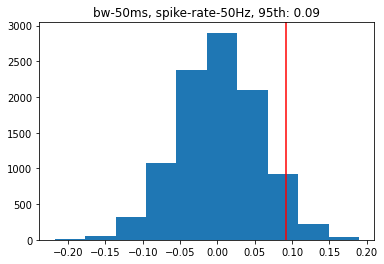

In [13]:
bin_width = 50
spike_rate = 50
null_dist = norm_obj.get_normalizer_null_dist_using_poisson(bin_width=bin_width, spike_rate=spike_rate)
null_dist = np.array(null_dist)
plt.hist(null_dist)
threshold = np.percentile(null_dist, 95)
plt.title(f"bw-{bin_width}ms, spike-rate-{spike_rate}Hz, 95th: {threshold:.2f}")
plt.axvline(threshold, color='r')


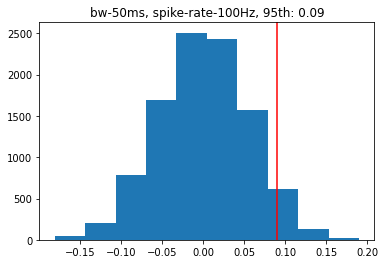

In [14]:
bin_width = 50
spike_rate = 100
null_dist = norm_obj.get_normalizer_null_dist_using_poisson(bin_width=bin_width, spike_rate=spike_rate)
null_dist = np.array(null_dist)
plt.hist(null_dist)
threshold = np.percentile(null_dist, 95)
plt.title(f"bw-{bin_width}ms, spike-rate-{spike_rate}Hz, 95th: {threshold:.2f}")
plt.axvline(threshold, color='r')


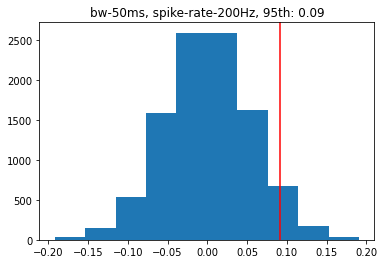

In [15]:
bin_width = 50
spike_rate = 200
null_dist = norm_obj.get_normalizer_null_dist_using_poisson(bin_width=bin_width, spike_rate=spike_rate)
null_dist = np.array(null_dist)
plt.hist(null_dist)
threshold = np.percentile(null_dist, 95)
plt.title(f"bw-{bin_width}ms, spike-rate-{spike_rate}Hz, 95th: {threshold:.2f}")
plt.axvline(threshold, color='r')

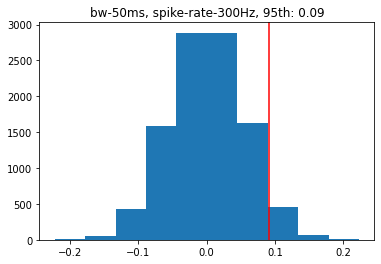

In [16]:
bin_width = 50
spike_rate = 300
null_dist = norm_obj.get_normalizer_null_dist_using_poisson(bin_width=bin_width, spike_rate=spike_rate)
null_dist = np.array(null_dist)
plt.hist(null_dist)
threshold = np.percentile(null_dist, 95)
plt.title(f"bw-{bin_width}ms, spike-rate-{spike_rate}Hz, 95th: {threshold:.2f}")
plt.axvline(threshold, color='r')

##### different bin widths

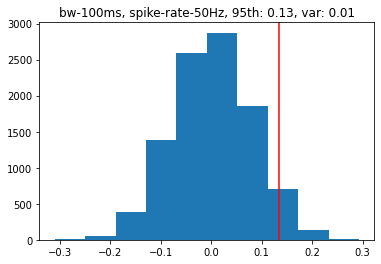

In [18]:
bin_width = 100
spike_rate = 50
null_dist = norm_obj.get_normalizer_null_dist_using_poisson(bin_width=bin_width, spike_rate=spike_rate)
null_dist = np.array(null_dist)
plt.hist(null_dist)
threshold = np.percentile(null_dist, 95)
variance = np.var(null_dist)
plt.title(f"bw-{bin_width}ms, spike-rate-{spike_rate}Hz, 95th: {threshold:.2f}, var: {variance:.2f}")
plt.axvline(threshold, color='r')

Normalizers not found: for bin-width 300ms and delay 50Hz.
Poisson Process: Null distribution for bin_width: 300, spike_rate: 50...
Writing null dist. poisson to the /depot/jgmakin/data/auditory_cortex/results/normalizers/null_distribution/normalizers_null_dist_poisson_bw_300ms_spike_rate_50hz.pkl


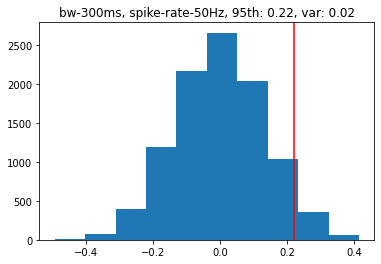

In [19]:
bin_width = 300
spike_rate = 50
null_dist = norm_obj.get_normalizer_null_dist_using_poisson(bin_width=bin_width, spike_rate=spike_rate)
null_dist = np.array(null_dist)
plt.hist(null_dist)
threshold = np.percentile(null_dist, 95)
variance = np.var(null_dist)
plt.title(f"bw-{bin_width}ms, spike-rate-{spike_rate}Hz, 95th: {threshold:.2f}, var: {variance:.2f}")
plt.axvline(threshold, color='r')

Normalizers not found: for bin-width 500ms and delay 50Hz.
Poisson Process: Null distribution for bin_width: 500, spike_rate: 50...
Writing null dist. poisson to the /depot/jgmakin/data/auditory_cortex/results/normalizers/null_distribution/normalizers_null_dist_poisson_bw_500ms_spike_rate_50hz.pkl


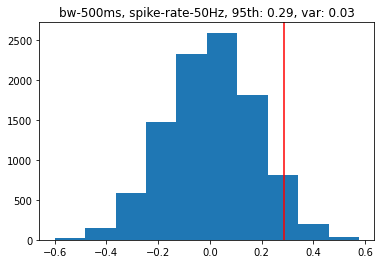

In [20]:
bin_width = 500
spike_rate = 50
null_dist = norm_obj.get_normalizer_null_dist_using_poisson(bin_width=bin_width, spike_rate=spike_rate)
null_dist = np.array(null_dist)
plt.hist(null_dist)
threshold = np.percentile(null_dist, 95)
variance = np.var(null_dist)
plt.title(f"bw-{bin_width}ms, spike-rate-{spike_rate}Hz, 95th: {threshold:.2f}, var: {variance:.2f}")
plt.axvline(threshold, color='r')

### Normalizer threshold, using Gaussian and Poisson 

In [6]:
corr_obj = Correlations()



Reading existing dataframe.
Reading exisiting normalizer thresholds...


0.06011905470334845

In [8]:
corr_obj.get_normalizer_threshold(800, True)

Reading exisiting normalizer thresholds...


0.3725365276167215

In [11]:
bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for bin_width in bin_widths:
    corr_obj.get_normalizer_threshold(bin_width, False)

Reading exisiting normalizer thresholds...
Computing null distribution for bin_width: 5, num_samples: 3314...
Reading exisiting normalizer thresholds...
Writing normalizers to the cache...
Reading exisiting normalizer thresholds...
Computing null distribution for bin_width: 10, num_samples: 1658...
Reading exisiting normalizer thresholds...
Writing normalizers to the cache...
Reading exisiting normalizer thresholds...
Computing null distribution for bin_width: 20, num_samples: 832...
Reading exisiting normalizer thresholds...
Writing normalizers to the cache...
Reading exisiting normalizer thresholds...
Computing null distribution for bin_width: 40, num_samples: 419...
Reading exisiting normalizer thresholds...
Writing normalizers to the cache...
Reading exisiting normalizer thresholds...
Computing null distribution for bin_width: 60, num_samples: 281...
Reading exisiting normalizer thresholds...
Writing normalizers to the cache...
Reading exisiting normalizer thresholds...
Computing n

In [2]:
norm_obj = Normalizer()
# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 500, 600, 700, 800, 900, 1000]
bin_widths = [1000]
# spike_rates = [10, 30, 50, 70, 90, 150, 200, 400]
spike_rates = [50]

threshold_g = []
threshold_poissons = {spr: [] for spr in spike_rates}
for bin_width in bin_widths:
    threshold_g.append(norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0])
    for spike_rate in spike_rates:
        threshold_poissons[spike_rate].append(
            norm_obj.compute_normalizer_threshold_using_poisson(
                bin_width=bin_width, spike_rate=spike_rate)[0]
        )


Reading existing dataframe.
Computing null distribution for bin_width: 1000, num_samples: 10...
Poisson Process: Null distribution for bin_width: 1000, spike_rate: 50...


In [3]:
threshold_g

[0.5612760939756597]

In [4]:
threshold_poissons

{50: [0.4133631614305362]}

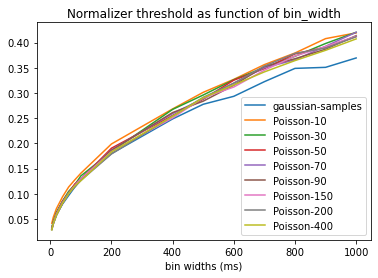

In [4]:
plt.plot(bin_widths, threshold_g, label="gaussian-samples")
for spike_rate in spike_rates:
    plt.plot(bin_widths, threshold_poissons[spike_rate], label=f"Poisson-{spike_rate}")
plt.title(f"Normalizer threshold as function of bin_width")
plt.xlabel(f"bin widths (ms)")
plt.legend(loc='best')

In [7]:
spike_rate = 50
ind = bin_widths.index(20)
threshold_poissons[spike_rate][ind]

0.06074503148578556

In [ ]:
bw_threshold = self.norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0]

In [8]:
duration = 0
for sent in norm_obj.metadata.test_sent_IDs:
        duration += norm_obj.metadata.stim_duration(sent)

In [9]:
duration

16.550687500000002

### copying normalizers from norm_obj..

In [2]:
norm_identifier = 'modified_bins_normalizer.csv'
norm_obj = Normalizer(norm_identifier)

bin_widths = np.sort(norm_obj.dataframe['bin_width'].unique())
for bin_width in bin_widths:
    print(f"Bin_width: {bin_width}," +
        f"sessions done: {len(norm_obj.dataframe[norm_obj.dataframe['bin_width']==bin_width]['session'].unique())}")

Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Bin_width: 10.0,sessions done: 45
Bin_width: 20.0,sessions done: 45
Bin_width: 40.0,sessions done: 45
Bin_width: 50.0,sessions done: 41
Bin_width: 60.0,sessions done: 45
Bin_width: 80.0,sessions done: 45
Bin_width: 100.0,sessions done: 45
Bin_width: 200.0,sessions done: 45
Bin_width: 300.0,sessions done: 45
Bin_width: 400.0,sessions done: 45
Bin_width: 500.0,sessions done: 45
Bin_width: 600.0,sessions done: 45
Bin_width: 700.0,sessions done: 45
Bin_width: 800.0,sessions done: 45


In [4]:
norm_identifier = 'modified_bins_normalizer_10.csv'
norm_obj_to_copy = Normalizer(norm_identifier)
bin_widths = np.sort(norm_obj_to_copy.dataframe['bin_width'].unique())
for bin_width in bin_widths:
    print(f"Bin_width: {bin_width}," +
        f"sessions done: {len(norm_obj_to_copy.dataframe[norm_obj_to_copy.dataframe['bin_width']==bin_width]['session'].unique())}")

Creating normalizer object from: modified_bins_normalizer_10.csv
Reading existing dataframe.
Bin_width: 10.0,sessions done: 45


In [5]:
# ## copy data from other files...
# norm_identifier = 'modified_bins_normalizer_10.csv'
# norm_obj_to_copy = Normalizer(norm_identifier)
# updated = norm_obj.write_data(norm_obj_to_copy.dataframe, norm_obj.filepath)

Creating normalizer object from: modified_bins_normalizer_10.csv
Reading existing dataframe.
Result updated...!


In [5]:
len(norm_obj.dataframe[norm_obj.dataframe['bin_width']==1000]['session'].unique())

45

In [20]:
import torch

Y = torch.randn((100,200))
Y_hat = torch.randn((100,200))

def correlation_loss(Y_hat, Y):

    N = Y.shape[1]

    Y_std = torch.std(Y, dim=0)
    Y_hat_std = torch.std(Y_hat, dim=0)
    inners = torch.matmul((Y - torch.mean(Y, dim=0)).T, (Y_hat - torch.mean(Y_hat, dim=0)))/N
    corr = torch.diag(inners)/torch.sqrt(Y_std*Y_hat_std)
    corr = torch.clip(corr, min=0, max=1)

    return torch.mean(corr)

In [24]:
import torch.nn.functional as F
input1 = torch.randn(100, 128)
input2 = torch.randn(100, 128)
output = F.cosine_similarity(input1, input2)
print(output)

tensor([ 0.0226,  0.0894,  0.0574,  0.0232,  0.0642, -0.0350, -0.0265,  0.1378,
        -0.0264, -0.0587,  0.0617,  0.0092, -0.1176, -0.0760,  0.0279, -0.1325,
        -0.0825, -0.1252,  0.0609,  0.0444,  0.0675,  0.0904, -0.0100, -0.0731,
        -0.1256, -0.0999,  0.0260,  0.0416, -0.0959,  0.0655, -0.1053, -0.0359,
         0.0515, -0.0510, -0.1624,  0.0662,  0.1786, -0.0577, -0.0724,  0.0150,
        -0.0626, -0.0603, -0.0403, -0.0292, -0.1211,  0.0101,  0.0317,  0.0113,
        -0.0603, -0.1113, -0.0906, -0.1579,  0.0565, -0.0051, -0.1050,  0.0817,
         0.0398, -0.0543, -0.0355, -0.0573,  0.0144, -0.1224, -0.0163, -0.1686,
        -0.1016, -0.0307,  0.0005,  0.0178,  0.0253,  0.1265,  0.0678, -0.1454,
        -0.1359,  0.0128,  0.0720,  0.1946,  0.1287, -0.0147,  0.0245, -0.1048,
        -0.1409,  0.0252, -0.0740, -0.0779, -0.0615,  0.0540, -0.0399, -0.1266,
        -0.0074,  0.0023,  0.1495,  0.0012, -0.0892,  0.0025,  0.0458, -0.1142,
        -0.0498, -0.0283,  0.0737, -0.01

In [25]:
output.shape

torch.Size([100])

Computing null distribution for bin_width: 5, num_samples: 3314...
Computing null distribution for bin_width: 10, num_samples: 1658...
Computing null distribution for bin_width: 20, num_samples: 832...
Computing null distribution for bin_width: 40, num_samples: 419...
Computing null distribution for bin_width: 60, num_samples: 281...
Computing null distribution for bin_width: 80, num_samples: 213...
Computing null distribution for bin_width: 100, num_samples: 170...
Computing null distribution for bin_width: 200, num_samples: 85...
Computing null distribution for bin_width: 400, num_samples: 45...
Computing null distribution for bin_width: 800, num_samples: 24...


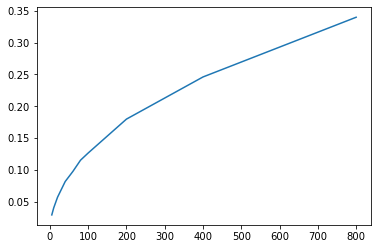

In [37]:
bin_widths= [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bw_threshold = {}
for bin_width in bin_widths:
    bw_threshold[bin_width] = norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0]

plt.plot(bw_threshold.keys(), bw_threshold.values())

In [ ]:
bin_widths= [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bw_threshold = {}
for bin_width in bin_widths:
    bw_threshold[bin_width] = norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0]

plt.plot(bw_threshold.keys(), bw_threshold.values())

compute_normalizer_threshold_using_poisson

In [7]:
duration = 0
for sent in norm_obj.metadata.test_sent_IDs:
        duration += norm_obj.metadata.stim_duration(sent)
spike_rate = 40

bin_widths= [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
# bin_widths = [20]

thresholds = {}
total_spikes = spike_rate * duration
# for bin_width in bin_widths:
bin_width = 20
bins = int(np.ceil(round(1000*duration/bin_width, 3)))
null_dist = []
for i in range(1000):
    spike_times_1 = np.random.uniform(0, duration, int(total_spikes))
    counts_1,_ = np.histogram(spike_times_1, bins)

    spike_times_2 = np.random.uniform(0, duration, int(total_spikes))
    counts_2, _ = np.histogram(spike_times_2, bins)

    null_dist.append(np.corrcoef(counts_1, counts_2)[0,1])

thresholds[bin_width] = np.percentile(null_dist, 95)

In [18]:
thresholds = {}

In [31]:
duration = 0
for sent in norm_obj.metadata.test_sent_IDs:
        duration += norm_obj.metadata.stim_duration(sent)
spike_rate = 400
total_spikes = spike_rate * duration
bin_widths= [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
# bin_widths = [20]


null_dists = {}
for bin_width in bin_widths:
    bins = int(np.ceil(round(1000*duration/bin_width, 3)))
    null_dist = []
    for i in range(1000):
        spike_times_1 = np.random.uniform(0, duration, int(total_spikes))
        counts_1,_ = np.histogram(spike_times_1, bins)

        spike_times_2 = np.random.uniform(0, duration, int(total_spikes))
        counts_2, _ = np.histogram(spike_times_2, bins)

        null_dist.append(np.corrcoef(counts_1, counts_2)[0,1])
    null_dists[bin_width] = null_dist

    
    thresholds[spike_rate]= {bin_width: np.percentile(null_dist, 95)}

In [17]:
thresholds[40]

0.08089956786707451

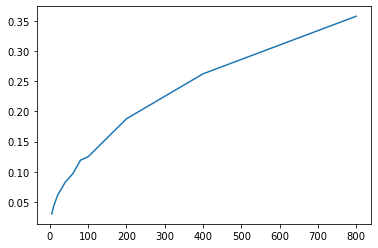

In [12]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(thresholds.keys(), thresholds.values())

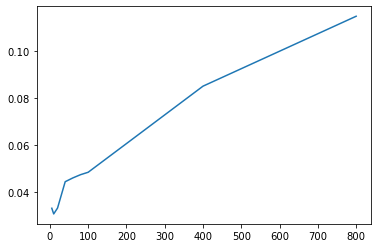

In [8]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(thresholds.keys(), thresholds.values())

(array([  6.,  27.,  83., 163., 201., 240., 182.,  69.,  23.,   6.]),
 array([-0.10289736, -0.08206092, -0.06122449, -0.04038805, -0.01955162,
         0.00128482,  0.02212125,  0.04295769,  0.06379412,  0.08463056,
         0.10546699]),
 <BarContainer object of 10 artists>)

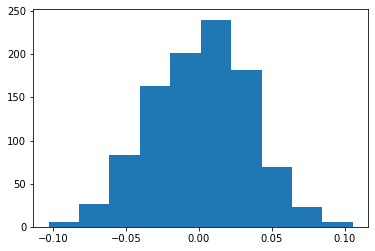

In [15]:
import matplotlib.pylab as plt
%matplotlib inline
bin_width = 20
plt.hist(null_dists[bin_width])

(array([  4.,  17.,  78., 168., 263., 250., 137.,  65.,  16.,   2.]),
 array([-0.11077022, -0.0874779 , -0.06418557, -0.04089325, -0.01760092,
         0.00569141,  0.02898373,  0.05227606,  0.07556838,  0.09886071,
         0.12215303]),
 <BarContainer object of 10 artists>)

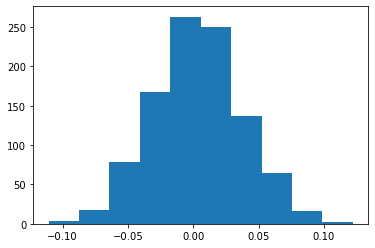

In [5]:
import matplotlib.pylab as plt
%matplotlib inline

plt.hist(null_dist)

In [6]:
np.percentile(null_dist, 95)

0.06084282840706959

In [44]:
bins

828

In [45]:
counts

array([2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 3, 1, 1, 0, 1, 1, 1, 1, 2,
       2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 4, 1, 0, 1, 2, 1, 3, 0, 1,
       1, 0, 4, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 3,
       0, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 3, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 3, 0, 0, 2, 2, 0, 1, 0, 3, 2,
       0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 3, 0, 1, 1, 1,
       0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       4, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 5, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2,
       0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 3,

In [16]:
session = 200206
bin_width = 20
delay = 0

dataset = norm_obj._get_dataset_obj(session)
all_repeated_trials = dataset.get_repeated_trials(
            sents=norm_obj.metadata.test_sent_IDs, bin_width=bin_width,
            delay=delay
            )

Loading Neural data for session: 200206 ... Done.


In [29]:
all_repeated_trials[0,:70,43].sum()

23.0

In [ ]:
from auditory_cortex

In [19]:
model_name = 'wav2letter_modified'
model_name_full = model_name
id = 'sampling_rate_opt_neural_delay'
model_name_full = model_name_full + '_' + id
corr_obj = Correlations(model_name=model_name_full)

Reading existing dataframe.


In [21]:
corr_obj.get_selected_data([180807], bin_width=200, delay=0, layer=0)

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,layer_type
154224,180807.0,0.0,0.0,200.0,0.0,0.0,0.037082,0.109398,500.0,0.0,conv
154225,180807.0,0.0,1.0,200.0,0.0,0.0,0.234885,0.453179,500.0,5.0,conv
154226,180807.0,0.0,2.0,200.0,0.0,0.0,0.339241,0.339308,500.0,0.0,conv
154227,180807.0,0.0,3.0,200.0,0.0,0.0,0.304311,0.253618,500.0,0.0,conv
154228,180807.0,0.0,4.0,200.0,0.0,0.0,0.387910,0.222875,500.0,0.0,conv
154229,180807.0,0.0,5.0,200.0,0.0,0.0,0.252644,0.066257,500.0,30.0,conv
154230,180807.0,0.0,6.0,200.0,0.0,0.0,0.024976,0.026751,500.0,45.0,conv
154231,180807.0,0.0,7.0,200.0,0.0,0.0,0.412596,0.289013,500.0,0.0,conv
154232,180807.0,0.0,8.0,200.0,0.0,0.0,0.405631,0.314603,500.0,5.0,conv
154233,180807.0,0.0,9.0,200.0,0.0,0.0,-0.090580,-0.019528,500.0,95.0,conv


In [22]:
corr_obj.get_selected_data([180807], bin_width=20, delay=0, layer=1)

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,layer_type
2896,180807.0,1.0,0.0,20.0,0.0,0.0,0.077897,0.109398,500.0,100.0,conv
2897,180807.0,1.0,1.0,20.0,0.0,0.0,0.248638,0.453179,500.0,30.0,conv
2898,180807.0,1.0,2.0,20.0,0.0,0.0,0.364426,0.339308,500.0,30.0,conv
2899,180807.0,1.0,3.0,20.0,0.0,0.0,0.333674,0.253618,500.0,0.0,conv
2900,180807.0,1.0,4.0,20.0,0.0,0.0,0.244013,0.222875,500.0,10.0,conv
2901,180807.0,1.0,5.0,20.0,0.0,0.0,0.035791,0.066257,500.0,100.0,conv
2902,180807.0,1.0,6.0,20.0,0.0,0.0,0.029460,0.026751,500.0,95.0,conv
2903,180807.0,1.0,7.0,20.0,0.0,0.0,0.207863,0.289013,500.0,35.0,conv
2904,180807.0,1.0,8.0,20.0,0.0,0.0,0.172783,0.314603,500.0,45.0,conv
2905,180807.0,1.0,9.0,20.0,0.0,0.0,-0.024887,-0.019528,500.0,95.0,conv


In [23]:
corr_obj.set_normalizers()

Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv
Normalizers updated, writing back now...
Save

In [25]:
corr_obj.get_selected_data([180807], bin_width=200, delay=0, layer=1)

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,layer_type,normalized_test_cc
154240,180807.0,1.0,0.0,200.0,0.0,0.0,0.230532,0.293915,500.0,0.0,conv,0.425226
154241,180807.0,1.0,1.0,200.0,0.0,0.0,0.362544,0.661228,500.0,0.0,conv,0.445846
154242,180807.0,1.0,2.0,200.0,0.0,0.0,0.419270,0.632566,500.0,0.0,conv,0.527158
154243,180807.0,1.0,3.0,200.0,0.0,0.0,0.356665,0.553605,500.0,0.0,conv,0.479358
154244,180807.0,1.0,4.0,200.0,0.0,0.0,0.355660,0.554582,500.0,0.0,conv,0.477586
154245,180807.0,1.0,5.0,200.0,0.0,0.0,0.126037,0.105827,500.0,45.0,conv,0.387436
154246,180807.0,1.0,6.0,200.0,0.0,0.0,0.133075,0.063051,500.0,45.0,conv,0.529971
154247,180807.0,1.0,7.0,200.0,0.0,0.0,0.412822,0.549643,500.0,0.0,conv,0.556830
154248,180807.0,1.0,8.0,200.0,0.0,0.0,0.358899,0.625393,500.0,0.0,conv,0.453833
154249,180807.0,1.0,9.0,200.0,0.0,0.0,-0.007944,-0.032578,500.0,95.0,conv,NaN


In [8]:
bin_widths = corr_obj.data['bin_width'].unique()
bin_width = bin_widths[0]
for bin_width in bin_widths:
    select_data = corr_obj.get_selected_data(bin_width=bin_width)
    sessions = select_data['session'].unique()
    delays = select_data['delay'].unique()
    for session in sessions:
        for delay in delays:
            select_data = corr_obj.get_selected_data(
                sessions=[session], bin_width=bin_width, delay=delay
            )
            channels = select_data['channel'].unique()
            selected_normalizers = norm_obj.get_normalizer_for_session(
                session=session, bin_width=bin_width, delay=delay
                )
            for ch in channels:
                ids = select_data[select_data['channel']==ch].index
                ch_normalizer = selected_normalizers[
                        selected_normalizers['channel']==ch
                    ]['normalizer'].head(1).item()
                corr_obj.data.loc[ids, 'normalizer'] = ch_normalizer

In [7]:
session = 200206
bin_width = 20
delay = 0
selected_normalizers = norm_obj.get_normalizer_for_session( session=session, bin_width=bin_width, delay=delay)

In [11]:
ch = 0
selected_normalizers[selected_normalizers['channel']==ch]['normalizer'].head(1).item()

0.1830396695361907

In [14]:
import numpy as np
corr_obj.data.loc[:, 'new'] = np.nan



In [15]:
corr_obj.data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc,layer_type,new
0,191113.0,0.0,0.0,40.0,0.0,0.046857,-0.016149,-0.005700,500.0,NaN,conv,NaN
1,191113.0,0.0,1.0,40.0,0.0,0.187930,0.123113,0.064661,500.0,0.484152,conv,NaN
2,191113.0,0.0,2.0,40.0,0.0,0.175732,0.124929,0.031331,500.0,0.705792,conv,NaN
3,191113.0,0.0,3.0,40.0,0.0,0.087614,0.034642,0.012075,500.0,0.315256,conv,NaN
4,191113.0,0.0,4.0,40.0,0.0,0.050437,-0.012446,-0.001426,500.0,NaN,conv,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
115135,191121.0,11.0,58.0,20.0,0.0,0.044128,-0.004785,0.003896,500.0,-0.076667,conv,NaN
115136,191121.0,11.0,59.0,20.0,0.0,0.184508,0.161731,0.173512,500.0,0.388266,conv,NaN
115137,191121.0,11.0,60.0,20.0,0.0,0.037813,0.016685,0.002105,500.0,0.363661,conv,NaN
115138,191121.0,11.0,61.0,20.0,0.0,0.037623,-0.000563,0.000737,500.0,-0.020756,conv,NaN


In [10]:
channels = select_data['channel'].unique()
            for ch in channels:
                ids = select_data[select_data['channel'] == ch].index

                norm = data2[(data2['session']==session) &(data2['channel']==ch)]['normalizer'].head(1).item() 

                data1.loc[ids, 'normalizer'] = norm

### Normalizer threshold for each bin_width...

In [13]:
norm_obj = Normalizer()

Reading existing dataframe.


In [14]:
norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0]

Computing null distribution for bin_width: 800, num_samples: 24...


0.3330899522657686

In [3]:
bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
thresholds = {}
for bin_width in bin_widths:
    thresholds[bin_width] = norm_obj.compute_normalizer_threshold(bin_width=bin_width)[0]

Computing null distribution for bin_width: 5, num_samples: 3314...
Computing null distribution for bin_width: 10, num_samples: 1658...
Computing null distribution for bin_width: 20, num_samples: 832...
Computing null distribution for bin_width: 40, num_samples: 419...
Computing null distribution for bin_width: 60, num_samples: 281...
Computing null distribution for bin_width: 80, num_samples: 213...
Computing null distribution for bin_width: 100, num_samples: 170...
Computing null distribution for bin_width: 200, num_samples: 85...
Computing null distribution for bin_width: 400, num_samples: 45...
Computing null distribution for bin_width: 800, num_samples: 24...


Text(0, 0.5, '$\\rho$')

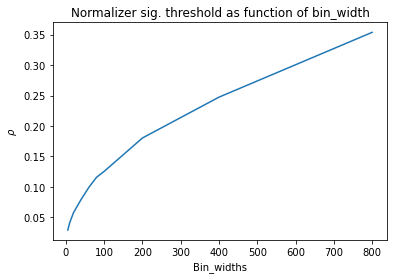

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(thresholds.keys(), thresholds.values())
plt.title(f"Normalizer sig. threshold as function of bin_width")
plt.xlabel("Bin_widths")
plt.ylabel("$\\rho$")

In [11]:
thresholds[20]

0.05659032798002723

In [4]:
bin_width = 800
p_value = 5


sent_IDs = norm_obj.metadata.test_sent_IDs
total_samples_test_set = 0
for sent in sent_IDs:
    total_samples_test_set += norm_obj.metadata.stim_samples(sent, bin_width=bin_width)

print(f"Computing null distribution for bin_width: {bin_width}")
null_dist = []
for i in range(10000):
    gaussian_sample_of_same_length = np.random.randn(2, total_samples_test_set)
    null_dist.append(np.corrcoef(gaussian_sample_of_same_length)[0,1])

q = 100 - p_value
np.percentile(null_dist, q)


Computing null distribution for bin_width: 800


0.3408717501985366

In [ ]:
import 
for sent in sent_IDs:
    total_samples_test_set += norm_obj.metadata.stim_samples(sent, bin_width=bin_width)

print(f"Computing null distribution for bin_width: {bin_width}")
null_dist = []
for i in range(10000):
    gaussian_sample_of_same_length = np.random.randn(2, total_samples_test_set)
    null_dist.append(np.corrcoef(gaussian_sample_of_same_length)[0,1])

q = 100 - p_value
np.percentile(null_dist, q)


In [ ]:
norm_obj.metadata.stim_samples(sent, bin_width=bin_width)

Text(0.5, 1.0, 'Null distribution at bin_width: 800')

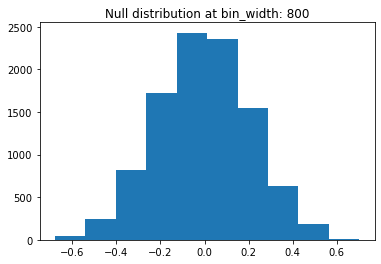

In [6]:
import matplotlib.pylab as plt
%matplotlib inline

plt.hist(null_dist)
plt.title(f"Null distribution at bin_width: {bin_width}")

In [10]:
length_of_samples = 24
random_samples = np.random.randn(2, length_of_samples)
np.corrcoef(random_samples)

array([[1.        , 0.11475796],
       [0.11475796, 1.        ]])

### rest of the code...

In [2]:
from auditory_cortex.neural_data.normalizer import Normalizer

norm_obj = Normalizer()

Reading existing dataframe.


In [8]:
norm = norm_obj.get_normalizer_for_session(180807)

In [9]:
norm

,session,channel,bin_width,delay,normalizer
16,180807.0,0.0,20.0,0.0,0.109266
17,180807.0,1.0,20.0,0.0,0.452635
18,180807.0,2.0,20.0,0.0,0.338900
19,180807.0,3.0,20.0,0.0,0.253313
20,180807.0,4.0,20.0,0.0,0.222607
21,180807.0,5.0,20.0,0.0,0.066178
22,180807.0,6.0,20.0,0.0,0.026719
23,180807.0,7.0,20.0,0.0,0.288665
24,180807.0,8.0,20.0,0.0,0.314225
25,180807.0,9.0,20.0,0.0,-0.019504


In [10]:
norm_200

,session,channel,bin_width,delay,normalizer
1660,180807.0,0.0,200.0,0.0,0.293915
1661,180807.0,1.0,200.0,0.0,0.661228
1662,180807.0,2.0,200.0,0.0,0.632566
1663,180807.0,3.0,200.0,0.0,0.553605
1664,180807.0,4.0,200.0,0.0,0.554582
1665,180807.0,5.0,200.0,0.0,0.105827
1666,180807.0,6.0,200.0,0.0,0.063051
1667,180807.0,7.0,200.0,0.0,0.549643
1668,180807.0,8.0,200.0,0.0,0.625393
1669,180807.0,9.0,200.0,0.0,-0.032578


In [7]:
norm_200 = norm_obj.get_normalizer_for_session(180807, bin_width=200)
norm_200

,session,channel,bin_width,delay,normalizer
1660,180807.0,0.0,200.0,0.0,0.293915
1661,180807.0,1.0,200.0,0.0,0.661228
1662,180807.0,2.0,200.0,0.0,0.632566
1663,180807.0,3.0,200.0,0.0,0.553605
1664,180807.0,4.0,200.0,0.0,0.554582
1665,180807.0,5.0,200.0,0.0,0.105827
1666,180807.0,6.0,200.0,0.0,0.063051
1667,180807.0,7.0,200.0,0.0,0.549643
1668,180807.0,8.0,200.0,0.0,0.625393
1669,180807.0,9.0,200.0,0.0,-0.032578


In [4]:
bin_widths = norm_obj.dataframe['bin_width'].unique()
bin_widths.sort()
for bin_width in bin_widths:
    sig_sessions = norm_obj.get_significant_sessions(bin_width=bin_width)

    print(f"Significant sessions for bw-{bin_width} = {sig_sessions.shape[0]}")

Significant sessions for bw-5.0 = 9
Significant sessions for bw-10.0 = 14
Significant sessions for bw-20.0 = 17
Significant sessions for bw-40.0 = 23
Significant sessions for bw-60.0 = 24
Significant sessions for bw-80.0 = 25
Significant sessions for bw-100.0 = 25
Significant sessions for bw-200.0 = 27
Significant sessions for bw-300.0 = 38
Significant sessions for bw-400.0 = 39
Significant sessions for bw-500.0 = 39
Significant sessions for bw-600.0 = 39
Significant sessions for bw-700.0 = 39
Significant sessions for bw-800.0 = 40
Significant sessions for bw-900.0 = 39
Significant sessions for bw-1000.0 = 39


In [3]:
bin_widths = norm_obj.dataframe['bin_width'].unique()
bin_widths.sort()
for bin_width in bin_widths:
    select_data = norm_obj._get_normalizers_for_bin_width_and_delay(bin_width=bin_width)
    sessions_done = select_data['session'].unique()

    print(f"Sessions done for bw-{bin_width} = {sessions_done.shape[0]}")
    

Sessions done for bw-5.0 = 45
Sessions done for bw-10.0 = 45
Sessions done for bw-20.0 = 45
Sessions done for bw-40.0 = 45
Sessions done for bw-60.0 = 45
Sessions done for bw-80.0 = 45
Sessions done for bw-100.0 = 45
Sessions done for bw-200.0 = 45
Sessions done for bw-300.0 = 45
Sessions done for bw-400.0 = 45
Sessions done for bw-500.0 = 45
Sessions done for bw-600.0 = 45
Sessions done for bw-700.0 = 45
Sessions done for bw-800.0 = 45
Sessions done for bw-900.0 = 45
Sessions done for bw-1000.0 = 45


In [12]:
sessions = norm_obj.get_significant_sessions(threshold=0.0672)
sum = 0
for session in sessions:
    channels = norm_obj.get_good_channels(session)
    sum += channels.size

In [4]:
sum

198

In [16]:
corr_obj = Correlations('wav2letter_modified'+'_opt_neural_delay')

In [17]:
corr_sessions = corr_obj.get_significant_sessions(0.0672)

In [18]:
corr_sessions.shape

(18,)

In [19]:
corr_sessions.sort()

In [20]:
sessions.sort()

In [21]:
for i in range(18):
    print(f"corr_sess: {corr_sessions[i]}, norm_sess: {sessions[i]}")

corr_sess: 180627.0, norm_sess: 180627.0
corr_sess: 180719.0, norm_sess: 180719.0
corr_sess: 180720.0, norm_sess: 180720.0
corr_sess: 180731.0, norm_sess: 180731.0
corr_sess: 180807.0, norm_sess: 180807.0
corr_sess: 180808.0, norm_sess: 180808.0
corr_sess: 180814.0, norm_sess: 180814.0
corr_sess: 191113.0, norm_sess: 191113.0
corr_sess: 191115.0, norm_sess: 191115.0
corr_sess: 191121.0, norm_sess: 191121.0
corr_sess: 191125.0, norm_sess: 191125.0
corr_sess: 191206.0, norm_sess: 191206.0
corr_sess: 191210.0, norm_sess: 191210.0
corr_sess: 200205.0, norm_sess: 200205.0
corr_sess: 200206.0, norm_sess: 200206.0
corr_sess: 200207.0, norm_sess: 200207.0
corr_sess: 200213.0, norm_sess: 200213.0
corr_sess: 200313.0, norm_sess: 200313.0


In [5]:
norm_obj.get_significant_sessions(threshold=0.068)

array([180807., 191206., 180808., 180814.])

In [21]:
corr_obj.get_good_channels(180719, 0.068)

[1.0]

In [9]:
norm_obj.get_good_channels(180814)

array([ 9., 14., 15., 18., 20., 23., 24., 26., 27., 28., 33.])

In [121]:
select_data = norm_obj._get_normalizers_for_bin_width_and_delay()
select_data['session'].unique().shape

(10,)

In [142]:
norm_obj.dataframe[(norm_obj.dataframe['bin_width']==100) &\
    (norm_obj.dataframe['delay']==0)
]['session'].unique().shape

(0,)

In [143]:
norm_obj.dataframe

,session,channel,bin_width,delay,normalizer
0,180413.0,0.0,20.0,0.0,0.010205
1,180413.0,1.0,20.0,0.0,-0.007076
2,180413.0,2.0,20.0,0.0,0.005463
3,180413.0,3.0,20.0,0.0,-0.005638
4,180413.0,4.0,20.0,0.0,-0.023312
...,...,...,...,...,...
1934,200219.0,58.0,80.0,0.0,0.143576
1935,200219.0,59.0,80.0,0.0,-0.017678
1936,200219.0,60.0,80.0,0.0,0.011825
1937,200219.0,61.0,80.0,0.0,-0.001971


### Speedup using inner product method...

In [93]:
import numpy as np
def inter_trial_corr(spikes, n=100000):
    """Compute distribution of inter-trials correlations.

    Args: 
        spikes (ndarray): (repeats, samples/time, channels)

    Returns:
        trials_corr (ndarray): (n, channels) distribution of inter-trial correlations
    """
    trials_corr = np.zeros((n, spikes.shape[2]))
    num_channels = spikes.shape[-1]
    N = spikes.shape[1]
    for t in range(n):
        trials = np.random.choice(np.arange(0,spikes.shape[0]), size=2, replace=False)
        X1 = spikes[trials[0]].squeeze()
        X2 = spikes[trials[1]].squeeze()

        X1 = X1 - np.mean(X1, axis=0)[None,:]
        X2 = X2 - np.mean(X2, axis=0)[None,:]
        sigma_1 = np.std(X1, axis=0)
        sigma_2 = np.std(X2, axis=0)
        cov = np.matmul(X1.T, X2)/(N)
        normalizers = sigma_1[:,None]@sigma_2[None,:]
        corr_mat = cov/normalizers
        corr = np.diag(corr_mat)

        trials_corr[t] = corr
        # for ch in range(num_channels):
        #     trials_corr[t, ch] = np.corrcoef(
        #         spikes[trials[0],:,ch].squeeze(), spikes[trials[1],:,ch].squeeze()
        #         )[0,1]
    return trials_corr

dataset = norm_obj._get_dataset_obj(200206)
all_repeated_trials = dataset.get_repeated_trials(
    sents=norm_obj.metadata.test_sent_IDs, bin_width=20,
    delay=0
    )

normalizer_all = inter_trial_corr(all_repeated_trials, n=2)

# normalizer_all = Normalizer.inter_trial_corr(all_repeated_trials, n=n)
normalizer_all_med = np.median(normalizer_all, axis=0)

In [113]:
ch = 32
normalizer_all_med[ch]

0.6359058389784193

In [114]:
chann = corr_obj.get_selected_data([200206], 20, 0, channel=ch)
chann.head(1)['normalizer']

92144    0.657779
Name: normalizer, dtype: float64

In [ ]:
corr_obj = Correlations("wav2letter_modified")

92112    0.18326
Name: normalizer, dtype: float64

### back to sessions...

In [145]:
dictt = {1: 2, 12: 14}
dictt

{1: 2, 12: 14}

In [146]:
dictt.clear()

In [147]:
dictt

{}

In [18]:
select_data['session'].unique()

array([180413., 180420., 180501., 180502., 180613., 180622., 180627.,
       180717., 180719., 180720.])

In [19]:
select_data[select_data['session']==180720]

,session,channel,bin_width,delay,normalizer
144,180720.0,0.0,20.0,0.0,0.003684
145,180720.0,1.0,20.0,0.0,0.058025
146,180720.0,2.0,20.0,0.0,0.120406
147,180720.0,3.0,20.0,0.0,0.072472
148,180720.0,4.0,20.0,0.0,0.066810
149,180720.0,5.0,20.0,0.0,0.007431
150,180720.0,6.0,20.0,0.0,0.062780
151,180720.0,7.0,20.0,0.0,0.282587
152,180720.0,8.0,20.0,0.0,0.036157
153,180720.0,9.0,20.0,0.0,-0.015161


In [6]:
corr_obj = Correlations("wav2letter_modified")
corr_obj.get_significant_sessions(0.068)

array([191113., 191125., 180731., 200207., 180720., 180807., 191206.,
       191121., 191210., 180627., 200213., 200206., 200313., 191115.,
       200205., 180814., 180719., 180808.])

In [20]:
corr_obj.get_good_channels(180720, threshold=0.068)

[2.0, 3.0, 7.0]

In [10]:
norm_obj.dataframe[norm_obj.dataframe['session']== 191115]

,session,channel,bin_width,delay,normalizer
1020,191115.0,0.0,80.0,0.0,NaN
1021,191115.0,1.0,80.0,0.0,0.026289
1022,191115.0,2.0,80.0,0.0,NaN
1023,191115.0,3.0,80.0,0.0,NaN
1024,191115.0,4.0,80.0,0.0,NaN
1025,191115.0,5.0,80.0,0.0,NaN
1026,191115.0,6.0,80.0,0.0,-0.009501
1027,191115.0,7.0,80.0,0.0,0.015198
1028,191115.0,8.0,80.0,0.0,NaN
1029,191115.0,9.0,80.0,0.0,0.014136


In [9]:
corr_obj = Correlations("wav2letter_modified")
corr_obj.get_significant_sessions(0.068)

array([191113., 191125., 180731., 200207., 180720., 180807., 191206.,
       191121., 191210., 180627., 200213., 200206., 200313., 191115.,
       200205., 180814., 180719., 180808.])

In [5]:
bin_width = 20
delay = 0

sessions = norm_obj.metadata.get_all_available_sessions()
select_data = norm_obj._get_normalizers_for_bin_width_and_delay(bin_width, delay)
sessions_done = select_data['session'].unique()


In [6]:
sessions_done

array([], dtype=object)

In [7]:
import numpy as np
sessions_remaining = sessions[np.isin(sessions, sessions_done, invert=True)]

In [9]:
sessions_remaining.shape

(45,)

In [10]:
sessions.shape

(45,)

In [6]:
if res.shape[0] ==0:
    

0

In [3]:
norm_dist = norm.compute_normalizer(200206, n=10)

Loading Neural data for session: 200206 ... Done.


In [4]:
norm_dist.size

64

In [5]:
import numpy as np
session = 200206
bin_width = 20
delay = 0

In [6]:
num_channels = norm_dist.size
data = np.stack([
    session*np.ones(num_channels),
    np.arange(num_channels),
    bin_width*np.ones(num_channels),
    delay*np.ones(num_channels),
    norm_dist
], axis=1
)

In [9]:
df = pd.DataFrame(
    data= data,
    columns=norm.dataframe.columns,
                  )

In [14]:
norm.dataframe = pd.concat([norm.dataframe, df], axis=0, ignore_index=True)

In [15]:
norm.dataframe

,session,channel,bin_width,delay,normalizer
0,200206.0,0.0,20.0,0.0,0.173893
1,200206.0,1.0,20.0,0.0,0.1897
2,200206.0,2.0,20.0,0.0,0.109464
3,200206.0,3.0,20.0,0.0,0.411408
4,200206.0,4.0,20.0,0.0,0.134697
...,...,...,...,...,...
59,200206.0,59.0,20.0,0.0,0.4973
60,200206.0,60.0,20.0,0.0,0.55358
61,200206.0,61.0,20.0,0.0,0.434416
62,200206.0,62.0,20.0,0.0,0.48853


In [11]:
df

,session,channel,bin_width,delay,normalizer
0,200206.0,0.0,20.0,0.0,0.173893
1,200206.0,1.0,20.0,0.0,0.189700
2,200206.0,2.0,20.0,0.0,0.109464
3,200206.0,3.0,20.0,0.0,0.411408
4,200206.0,4.0,20.0,0.0,0.134697
...,...,...,...,...,...
59,200206.0,59.0,20.0,0.0,0.497300
60,200206.0,60.0,20.0,0.0,0.553580
61,200206.0,61.0,20.0,0.0,0.434416
62,200206.0,62.0,20.0,0.0,0.488530


In [6]:
df

,session,channel,bin_width,delay,normalizer


In [8]:
filename = "wav2letter_modified_normalizer2_corr_results.csv"
normalizer_file = os.path.join(saved_corr_dir, filename)
data = pd.read_csv(normalizer_file)

In [10]:
saved_corr_dir

'/depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations'

In [9]:
data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays
0,180420.0,0.0,0.0,20.0,0.0,0.036105,-0.007360,-0.006940,499.0,0.0
1,180420.0,0.0,1.0,20.0,0.0,0.046602,-0.016293,-0.024175,499.0,0.0
2,180420.0,0.0,2.0,20.0,0.0,0.045748,-0.016081,-0.024135,499.0,0.0
3,180420.0,0.0,3.0,20.0,0.0,0.046712,-0.011621,-0.024589,499.0,0.0
4,180420.0,0.0,4.0,20.0,0.0,0.045727,-0.011520,-0.024368,499.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3833,180501.0,1.0,11.0,20.0,0.0,0.063529,0.016588,-0.012557,499.0,0.0
3834,180501.0,1.0,12.0,20.0,0.0,0.073001,0.018319,-0.013108,499.0,0.0
3835,180501.0,1.0,13.0,20.0,0.0,0.073247,0.019468,-0.022472,499.0,0.0
3836,180501.0,1.0,14.0,20.0,0.0,0.073651,0.018012,-0.013134,499.0,0.0


In [2]:
corr_obj = Correlations("wav2letter_modified_normalizer2")

In [4]:
corr_obj.data[corr_obj.data['session']==200206]

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,normalized_test_cc
3354,200206.0,0.0,0.0,20.0,0.0,0.093445,0.071359,0.183260,499.0,0.0,0.166692
3355,200206.0,0.0,1.0,20.0,0.0,0.054043,0.013222,0.221996,499.0,0.0,0.028063
3356,200206.0,0.0,2.0,20.0,0.0,0.038743,0.003472,0.139223,499.0,0.0,0.009306
3357,200206.0,0.0,3.0,20.0,0.0,0.085172,0.041210,0.413683,499.0,0.0,0.064072
3358,200206.0,0.0,4.0,20.0,0.0,0.077916,0.061912,0.122561,499.0,0.0,0.176847
...,...,...,...,...,...,...,...,...,...,...,...
3477,200206.0,1.0,59.0,20.0,0.0,0.391983,0.372889,0.506141,499.0,0.0,0.524135
3478,200206.0,1.0,60.0,20.0,0.0,0.361155,0.341689,0.579529,499.0,0.0,0.448842
3479,200206.0,1.0,61.0,20.0,0.0,0.214622,0.170872,0.445747,499.0,0.0,0.255933
3480,200206.0,1.0,62.0,20.0,0.0,0.369474,0.340756,0.550849,499.0,0.0,0.459120


### rest of the code..

In [ ]:
import numpy as np
from auditory_cortex.dataset import NeuralData
from auditory_cortex import utils, config, results_dir

import seaborn as sns
import matplotlib.pylab as plt
def plot_medians(norm_dist, ch):
    normalizer_medians = []
    normalizer_dev = []
    num_sents_list = []
    for k,v in norm_dist.items():
        normalizer_medians.append(np.median(v[:,ch]))
        normalizer_dev.append(np.std(v[:,ch]))
        num_sents_list.append(k)
    plt.plot(num_sents_list, normalizer_medians)
    # sns.lineplot(x=num_sents_list, y=normalizer_medians, errorbar=normalizer_dev)
    plt.title(f"Median normalizers: session-{session}, ch-{ch}")

def compute_normalizer_dist(dataset, num_sents=5, n_itr = 10000, bin_width = 20, delay=0):
    """Compute distribution of normalizer using given number of 
    sents (having repeated trials)"""
    sents = np.array([12,13,32,43,56,163,212,218,287,308])
    if num_sents > sents.size:
        num_sents = sents.size
        print(f"At max {num_sents} sents can be used.")

    sent_ids = np.random.choice(sents, size=num_sents, replace=False)
    # ids = np.random.randint(len(sents), size=num_sents)
    # sent_ids = np.array(sents)[ids]

    all_repeated_trials = dataset.get_repeated_trials(sents=sent_ids, bin_width=bin_width, delay=delay)
    normalizer_dist = utils.inter_trial_corr(all_repeated_trials, n=n_itr)

    return normalizer_dist


In [2]:
data_dir = config['neural_data_dir']
session = '200206'
dataset = NeuralData(data_dir, session)

Loading Neural data for session: 200206 ... Done.


In [3]:
normalizer_dist = {}
num_sents_list = [2,3,4,5,6,7,8,9,10]
for num_sents in num_sents_list:
    dist = compute_normalizer_dist(dataset=dataset, num_sents=num_sents)
    normalizer_dist[num_sents] = dist

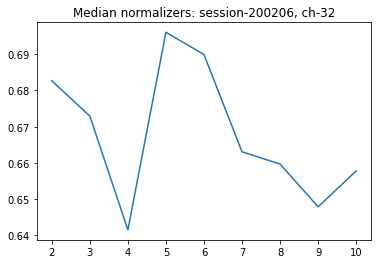

In [8]:
ch = 32
plot_medians(normalizer_dist, ch)

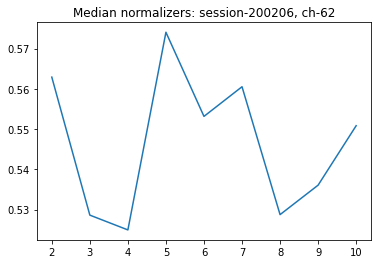

In [9]:
ch = 62
plot_medians(normalizer_dist, ch)

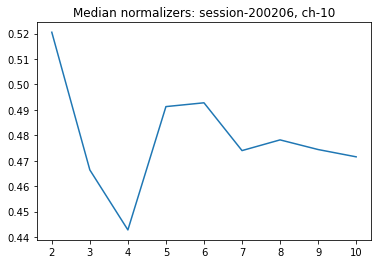

In [25]:
ch = 10
plot_medians(normalizer_dist, ch)

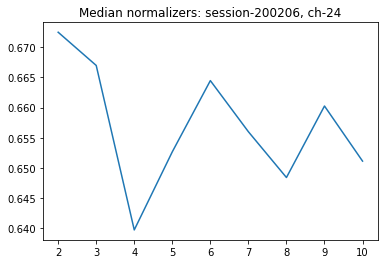

In [11]:
ch = 24
plot_medians(normalizer_dist, ch)

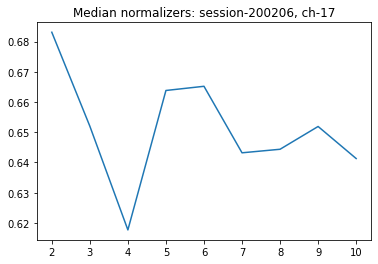

In [12]:
ch = 17
plot_medians(normalizer_dist, ch)

### save distribution...

In [15]:
import os
path = os.path.join(results_dir, f'normalizers_dict_session_{session}.npy')
np.save(path, normalizer_dist)

### load distribution...

In [17]:
session = 200206
path = os.path.join(results_dir, f'normalizers_dict_session_{session}.npy')
norm_dist = np.load(path, allow_pickle=True)

In [21]:
a = np.random.randn(10)
b = np.random.randn(10)

np.corrcoef(a,b)[0,1]

0.7530194152772853

In [ ]:

normalizer_medians = []
ch = 32
for k,v in normalizer_dist.items():
    normalizer_medians.append(np.median(v[:,ch]))
plt.plot(normalizer_medians)
plt.title(f"Median normalizers: session-{session}, ch-{ch}")




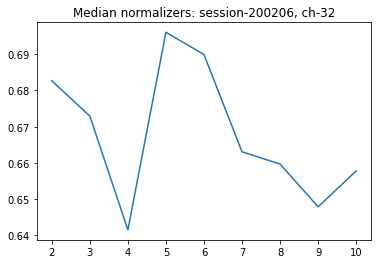

In [18]:
medians = np.median(normalizer_dist, axis=0)

In [19]:
medians[32]

0.6601224200435402